In [3]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Depression Prevalence 

In [4]:
dep_age= pd.read_csv('./data/depressive-disorders-prevalence-by-age.csv')
dep_age

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: 5-14 years,Depressive disorders (share of population) - Sex: Both - Age: 15-19 years,Depressive disorders (share of population) - Sex: Both - Age: 20-24 years,Depressive disorders (share of population) - Sex: Both - Age: 25-29 years,Depressive disorders (share of population) - Sex: Both - Age: 30-34 years,Depressive disorders (share of population) - Sex: Both - Age: 35-39 years,Depressive disorders (share of population) - Sex: Both - Age: 40-44 years,Depressive disorders (share of population) - Sex: Both - Age: 45-49 years,Depressive disorders (share of population) - Sex: Both - Age: 50-54 years,Depressive disorders (share of population) - Sex: Both - Age: 55-59 years,Depressive disorders (share of population) - Sex: Both - Age: 60-64 years,Depressive disorders (share of population) - Sex: Both - Age: 65-69 years,Depressive disorders (share of population) - Sex: Both - Age: 70+ years,Depressive disorders (share of population) - Sex: Both - Age: All ages,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.905963,4.347563,6.074801,6.706133,7.296537,8.066108,8.366741,7.965051,7.506240,7.047010,6.614255,6.235099,5.584506,3.851845,4.996118
1,Afghanistan,AFG,1991,0.879691,4.309884,6.051823,6.645131,7.276406,8.080511,8.417283,7.970613,7.518521,7.069068,6.611909,6.224764,5.582696,3.804602,4.989290
2,Afghanistan,AFG,1992,0.861307,4.275235,6.023424,6.566325,7.253039,8.079038,8.453177,7.994291,7.542725,7.078946,6.630807,6.223507,5.580899,3.750635,4.981346
3,Afghanistan,AFG,1993,0.844375,4.260059,6.015496,6.533423,7.224668,8.074298,8.472788,8.008495,7.563697,7.083028,6.636164,6.225632,5.581034,3.709995,4.976958
4,Afghanistan,AFG,1994,0.832355,4.265135,5.998445,6.528235,7.195589,8.065885,8.458712,8.063702,7.597561,7.092062,6.651030,6.231113,5.581993,3.668750,4.977782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.377827,2.168168,3.391166,3.795880,4.109543,4.488432,4.866082,5.249707,5.618920,5.911481,6.227326,6.631586,7.352009,2.520987,3.407624
6416,Zimbabwe,ZWE,2016,0.376839,2.172195,3.393414,3.797089,4.104457,4.502368,4.872513,5.248441,5.610675,5.918619,6.229002,6.652774,7.368291,2.538140,3.410755
6417,Zimbabwe,ZWE,2017,0.375450,2.170327,3.394241,3.799196,4.110873,4.518751,4.878552,5.239137,5.600607,5.912385,6.235254,6.658259,7.372329,2.556172,3.411965
6418,Zimbabwe,ZWE,2018,0.380171,2.178040,3.393811,3.806700,4.126994,4.514895,4.877077,5.231630,5.572390,5.882398,6.219481,6.627424,7.316853,2.574868,3.406929


In [5]:
dep_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          6420 non-null   object 
 1   Code                                                                            6150 non-null   object 
 2   Year                                                                            6420 non-null   int64  
 3   Depressive disorders (share of population) - Sex: Both - Age: 5-14 years        6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: 15-19 years       6420 non-null   float64
 5   Depressive disorders (share of population) - Sex: Both - Age: 20-24 years       6420 non-null   float64
 6   Depressive disor

In [4]:
dep_age.isnull().sum()

Entity                                                                              0
Code                                                                              270
Year                                                                                0
Depressive disorders (share of population) - Sex: Both - Age: 5-14 years            0
Depressive disorders (share of population) - Sex: Both - Age: 15-19 years           0
Depressive disorders (share of population) - Sex: Both - Age: 20-24 years           0
Depressive disorders (share of population) - Sex: Both - Age: 25-29 years           0
Depressive disorders (share of population) - Sex: Both - Age: 30-34 years           0
Depressive disorders (share of population) - Sex: Both - Age: 35-39 years           0
Depressive disorders (share of population) - Sex: Both - Age: 40-44 years           0
Depressive disorders (share of population) - Sex: Both - Age: 45-49 years           0
Depressive disorders (share of population) - Sex: Both

In [6]:
#Rename columns
dep_age= dep_age.rename(columns= {'Entity':'country', 'Code':'code', 'Year':'year',
       'Depressive disorders (share of population) - Sex: Both - Age: 5-14 years': '5-14 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 15-19 years': '15-19 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 20-24 years': '20-24 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 25-29 years': '25-29 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 30-34 years': '30-34 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 35-39 years': '35-39 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 40-44 years': '40-44 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 45-49 years': '45-49 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 50-54 years': '50-54 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 55-59 years': '55-59 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 60-64 years': '60-64 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 65-69 years': '65-69 years',
       'Depressive disorders (share of population) - Sex: Both - Age: 70+ years': '+70 years',
       'Depressive disorders (share of population) - Sex: Both - Age: All ages':'d_all_ages',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized':'d_age_std'})


In [7]:
dep_age

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,d_all_ages,d_age_std
0,Afghanistan,AFG,1990,0.905963,4.347563,6.074801,6.706133,7.296537,8.066108,8.366741,7.965051,7.506240,7.047010,6.614255,6.235099,5.584506,3.851845,4.996118
1,Afghanistan,AFG,1991,0.879691,4.309884,6.051823,6.645131,7.276406,8.080511,8.417283,7.970613,7.518521,7.069068,6.611909,6.224764,5.582696,3.804602,4.989290
2,Afghanistan,AFG,1992,0.861307,4.275235,6.023424,6.566325,7.253039,8.079038,8.453177,7.994291,7.542725,7.078946,6.630807,6.223507,5.580899,3.750635,4.981346
3,Afghanistan,AFG,1993,0.844375,4.260059,6.015496,6.533423,7.224668,8.074298,8.472788,8.008495,7.563697,7.083028,6.636164,6.225632,5.581034,3.709995,4.976958
4,Afghanistan,AFG,1994,0.832355,4.265135,5.998445,6.528235,7.195589,8.065885,8.458712,8.063702,7.597561,7.092062,6.651030,6.231113,5.581993,3.668750,4.977782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.377827,2.168168,3.391166,3.795880,4.109543,4.488432,4.866082,5.249707,5.618920,5.911481,6.227326,6.631586,7.352009,2.520987,3.407624
6416,Zimbabwe,ZWE,2016,0.376839,2.172195,3.393414,3.797089,4.104457,4.502368,4.872513,5.248441,5.610675,5.918619,6.229002,6.652774,7.368291,2.538140,3.410755
6417,Zimbabwe,ZWE,2017,0.375450,2.170327,3.394241,3.799196,4.110873,4.518751,4.878552,5.239137,5.600607,5.912385,6.235254,6.658259,7.372329,2.556172,3.411965
6418,Zimbabwe,ZWE,2018,0.380171,2.178040,3.393811,3.806700,4.126994,4.514895,4.877077,5.231630,5.572390,5.882398,6.219481,6.627424,7.316853,2.574868,3.406929


In [8]:
#Check missing rows
missing_rows = dep_age[dep_age['code'].isnull()]
missing_rows

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,d_all_ages,d_age_std
30,Africa (IHME GBD),NaN,1990,0.578769,3.394865,5.152831,5.690023,6.044369,6.409185,6.713156,7.050345,7.329495,7.555683,7.753611,7.903639,8.014534,3.362277,4.602806
31,Africa (IHME GBD),NaN,1991,0.579783,3.396472,5.153371,5.679850,6.031242,6.394224,6.705987,7.038984,7.325306,7.561101,7.746468,7.898912,8.007283,3.366102,4.598041
32,Africa (IHME GBD),NaN,1992,0.581051,3.397633,5.152159,5.666673,6.017628,6.379814,6.699420,7.033682,7.317362,7.559666,7.746992,7.887961,8.001843,3.370605,4.593013
33,Africa (IHME GBD),NaN,1993,0.582089,3.398012,5.150638,5.656159,6.006180,6.370189,6.695319,7.027349,7.307444,7.557354,7.744774,7.875797,7.999065,3.375853,4.588568
34,Africa (IHME GBD),NaN,1994,0.583023,3.399273,5.151042,5.647681,5.997841,6.365277,6.697406,7.022855,7.302434,7.558512,7.748301,7.866970,7.995733,3.382186,4.586263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Upper-middle-income countries,NaN,2015,0.541344,2.371237,3.103801,3.300987,3.717922,4.149300,4.527347,4.965065,5.375662,5.711131,5.989317,5.907717,5.492956,3.599382,3.133155
6146,Upper-middle-income countries,NaN,2016,0.535092,2.358855,3.117876,3.296236,3.701756,4.165317,4.544337,4.963882,5.384088,5.714009,5.994944,5.915223,5.499683,3.618784,3.134309
6147,Upper-middle-income countries,NaN,2017,0.528481,2.344443,3.129747,3.300142,3.680877,4.174553,4.558567,4.962794,5.388048,5.720993,5.992240,5.922000,5.501232,3.636546,3.134088
6148,Upper-middle-income countries,NaN,2018,0.525735,2.344867,3.150494,3.318803,3.660879,4.178152,4.566402,4.951383,5.369558,5.712633,5.957933,5.907493,5.494833,3.652127,3.132297


In [9]:
continent=["Africa (IHME GBD)", 'Asia (IHME GBD)', 'Europe (IHME GBD)','Upper-middle-income countries', 'Low-income countries',
          'Lower-middle-income countries','High-income countries','America (IHME GBD)','European Union (27)' ]

dep_age_continents= dep_age[dep_age['country'].isin(continent)]
dep_age_continents

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,d_all_ages,d_age_std
30,Africa (IHME GBD),NaN,1990,0.578769,3.394865,5.152831,5.690023,6.044369,6.409185,6.713156,7.050345,7.329495,7.555683,7.753611,7.903639,8.014534,3.362277,4.602806
31,Africa (IHME GBD),NaN,1991,0.579783,3.396472,5.153371,5.679850,6.031242,6.394224,6.705987,7.038984,7.325306,7.561101,7.746468,7.898912,8.007283,3.366102,4.598041
32,Africa (IHME GBD),NaN,1992,0.581051,3.397633,5.152159,5.666673,6.017628,6.379814,6.699420,7.033682,7.317362,7.559666,7.746992,7.887961,8.001843,3.370605,4.593013
33,Africa (IHME GBD),NaN,1993,0.582089,3.398012,5.150638,5.656159,6.006180,6.370189,6.695319,7.027349,7.307444,7.557354,7.744774,7.875797,7.999065,3.375853,4.588568
34,Africa (IHME GBD),NaN,1994,0.583023,3.399273,5.151042,5.647681,5.997841,6.365277,6.697406,7.022855,7.302434,7.558512,7.748301,7.866970,7.995733,3.382186,4.586263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Upper-middle-income countries,NaN,2015,0.541344,2.371237,3.103801,3.300987,3.717922,4.149300,4.527347,4.965065,5.375662,5.711131,5.989317,5.907717,5.492956,3.599382,3.133155
6146,Upper-middle-income countries,NaN,2016,0.535092,2.358855,3.117876,3.296236,3.701756,4.165317,4.544337,4.963882,5.384088,5.714009,5.994944,5.915223,5.499683,3.618784,3.134309
6147,Upper-middle-income countries,NaN,2017,0.528481,2.344443,3.129747,3.300142,3.680877,4.174553,4.558567,4.962794,5.388048,5.720993,5.992240,5.922000,5.501232,3.636546,3.134088
6148,Upper-middle-income countries,NaN,2018,0.525735,2.344867,3.150494,3.318803,3.660879,4.178152,4.566402,4.951383,5.369558,5.712633,5.957933,5.907493,5.494833,3.652127,3.132297


In [10]:
dep_age.isnull().sum()

country          0
code           270
year             0
5-14 years       0
15-19 years      0
20-24 years      0
25-29 years      0
30-34 years      0
35-39 years      0
40-44 years      0
45-49 years      0
50-54 years      0
55-59 years      0
60-64 years      0
65-69 years      0
+70 years        0
d_all_ages       0
d_age_std        0
dtype: int64

In [11]:
#Remove rows with missing values
dep_age_continents_removed = dep_age[~dep_age['country'].isin(continent)]
dep_age_continents_removed

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,d_all_ages,d_age_std
0,Afghanistan,AFG,1990,0.905963,4.347563,6.074801,6.706133,7.296537,8.066108,8.366741,7.965051,7.506240,7.047010,6.614255,6.235099,5.584506,3.851845,4.996118
1,Afghanistan,AFG,1991,0.879691,4.309884,6.051823,6.645131,7.276406,8.080511,8.417283,7.970613,7.518521,7.069068,6.611909,6.224764,5.582696,3.804602,4.989290
2,Afghanistan,AFG,1992,0.861307,4.275235,6.023424,6.566325,7.253039,8.079038,8.453177,7.994291,7.542725,7.078946,6.630807,6.223507,5.580899,3.750635,4.981346
3,Afghanistan,AFG,1993,0.844375,4.260059,6.015496,6.533423,7.224668,8.074298,8.472788,8.008495,7.563697,7.083028,6.636164,6.225632,5.581034,3.709995,4.976958
4,Afghanistan,AFG,1994,0.832355,4.265135,5.998445,6.528235,7.195589,8.065885,8.458712,8.063702,7.597561,7.092062,6.651030,6.231113,5.581993,3.668750,4.977782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.377827,2.168168,3.391166,3.795880,4.109543,4.488432,4.866082,5.249707,5.618920,5.911481,6.227326,6.631586,7.352009,2.520987,3.407624
6416,Zimbabwe,ZWE,2016,0.376839,2.172195,3.393414,3.797089,4.104457,4.502368,4.872513,5.248441,5.610675,5.918619,6.229002,6.652774,7.368291,2.538140,3.410755
6417,Zimbabwe,ZWE,2017,0.375450,2.170327,3.394241,3.799196,4.110873,4.518751,4.878552,5.239137,5.600607,5.912385,6.235254,6.658259,7.372329,2.556172,3.411965
6418,Zimbabwe,ZWE,2018,0.380171,2.178040,3.393811,3.806700,4.126994,4.514895,4.877077,5.231630,5.572390,5.882398,6.219481,6.627424,7.316853,2.574868,3.406929


In [12]:
dep_age_continents_removed.isnull().sum()

country        0
code           0
year           0
5-14 years     0
15-19 years    0
20-24 years    0
25-29 years    0
30-34 years    0
35-39 years    0
40-44 years    0
45-49 years    0
50-54 years    0
55-59 years    0
60-64 years    0
65-69 years    0
+70 years      0
d_all_ages     0
d_age_std      0
dtype: int64

In [13]:
#Melt the DF
dep_age = dep_age_continents_removed.melt(id_vars=['country','code','year'], var_name='age_range', value_name='dep_age_pop')
dep_age

,country,code,year,age_range,dep_age_pop
0,Afghanistan,AFG,1990,5-14 years,0.905963
1,Afghanistan,AFG,1991,5-14 years,0.879691
2,Afghanistan,AFG,1992,5-14 years,0.861307
3,Afghanistan,AFG,1993,5-14 years,0.844375
4,Afghanistan,AFG,1994,5-14 years,0.832355
...,...,...,...,...,...
92245,Zimbabwe,ZWE,2015,d_age_std,3.407624
92246,Zimbabwe,ZWE,2016,d_age_std,3.410755
92247,Zimbabwe,ZWE,2017,d_age_std,3.411965
92248,Zimbabwe,ZWE,2018,d_age_std,3.406929


In [14]:
#Filter standardized age-depression and all ages-depression
dep_age_std= dep_age[(dep_age['age_range']=='d_age_std')|(dep_age['age_range']=='d_all_ages')]
dep_age_std

,country,code,year,age_range,dep_age_pop
79950,Afghanistan,AFG,1990,d_all_ages,3.851845
79951,Afghanistan,AFG,1991,d_all_ages,3.804602
79952,Afghanistan,AFG,1992,d_all_ages,3.750635
79953,Afghanistan,AFG,1993,d_all_ages,3.709995
79954,Afghanistan,AFG,1994,d_all_ages,3.668750
...,...,...,...,...,...
92245,Zimbabwe,ZWE,2015,d_age_std,3.407624
92246,Zimbabwe,ZWE,2016,d_age_std,3.410755
92247,Zimbabwe,ZWE,2017,d_age_std,3.411965
92248,Zimbabwe,ZWE,2018,d_age_std,3.406929


In [15]:
dep_age_std.to_csv('./data/depression_age_std.csv')

In [16]:
rows_drop= dep_age[(dep_age['age_range'] == 'd_age_std') | (dep_age['age_range'] == 'd_all_ages')].index
dep_age_new = dep_age.drop(rows_drop)
dep_age_new

,country,code,year,age_range,dep_age_pop
0,Afghanistan,AFG,1990,5-14 years,0.905963
1,Afghanistan,AFG,1991,5-14 years,0.879691
2,Afghanistan,AFG,1992,5-14 years,0.861307
3,Afghanistan,AFG,1993,5-14 years,0.844375
4,Afghanistan,AFG,1994,5-14 years,0.832355
...,...,...,...,...,...
79945,Zimbabwe,ZWE,2015,+70 years,7.352009
79946,Zimbabwe,ZWE,2016,+70 years,7.368291
79947,Zimbabwe,ZWE,2017,+70 years,7.372329
79948,Zimbabwe,ZWE,2018,+70 years,7.316853


In [17]:
dep_age_new.to_csv('./data/depression_age_cleaned.csv')

In [18]:
dep_age_all= dep_age_std[dep_age_std['age_range']=='d_all_ages']
dep_age_all

,country,code,year,age_range,dep_age_pop
79950,Afghanistan,AFG,1990,d_all_ages,3.851845
79951,Afghanistan,AFG,1991,d_all_ages,3.804602
79952,Afghanistan,AFG,1992,d_all_ages,3.750635
79953,Afghanistan,AFG,1993,d_all_ages,3.709995
79954,Afghanistan,AFG,1994,d_all_ages,3.668750
...,...,...,...,...,...
86095,Zimbabwe,ZWE,2015,d_all_ages,2.520987
86096,Zimbabwe,ZWE,2016,d_all_ages,2.538140
86097,Zimbabwe,ZWE,2017,d_all_ages,2.556172
86098,Zimbabwe,ZWE,2018,d_all_ages,2.574868


In [19]:
dep_age_all.to_csv('./data/dep_age_all.csv')

In [20]:
rows_drop= dep_age_std[(dep_age_std['age_range'] =='d_all_ages')]

In [21]:
dep_age_new

,country,code,year,age_range,dep_age_pop
0,Afghanistan,AFG,1990,5-14 years,0.905963
1,Afghanistan,AFG,1991,5-14 years,0.879691
2,Afghanistan,AFG,1992,5-14 years,0.861307
3,Afghanistan,AFG,1993,5-14 years,0.844375
4,Afghanistan,AFG,1994,5-14 years,0.832355
...,...,...,...,...,...
79945,Zimbabwe,ZWE,2015,+70 years,7.352009
79946,Zimbabwe,ZWE,2016,+70 years,7.368291
79947,Zimbabwe,ZWE,2017,+70 years,7.372329
79948,Zimbabwe,ZWE,2018,+70 years,7.316853


In [22]:
dep_age_new.to_csv('./data/depression_age_cleaned.csv')

# Depression - sex

In [23]:
#Read Dataset
dep_sex=pd.read_csv('./data/depressive-disorders-prevalence-males-vs-females.csv')
dep_sex

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Male - Age: Age-standardized,Depressive disorders (share of population) - Sex: Female - Age: Age-standardized,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.153338,5.750400,10694804.0,NaN
2,Afghanistan,AFG,1991,4.158332,5.745472,10745168.0,NaN
3,Afghanistan,AFG,1992,4.165729,5.743851,12057436.0,NaN
4,Afghanistan,AFG,1993,4.172712,5.740309,14003764.0,NaN
...,...,...,...,...,...,...,...
58415,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58416,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58417,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN


In [24]:
dep_sex.isnull().sum()

Entity                                                                                  0
Code                                                                                 3401
Year                                                                                    0
Depressive disorders (share of population) - Sex: Male - Age: Age-standardized      52000
Depressive disorders (share of population) - Sex: Female - Age: Age-standardized    52000
Population (historical estimates)                                                     168
Continent                                                                           58135
dtype: int64

In [25]:
#Rename columns
dep_sex= dep_sex.rename(columns={'Entity':'country','Code':'code','Year':'year',
            'Depressive disorders (share of population) - Sex: Male - Age: Age-standardized':'dep_male',
            'Depressive disorders (share of population) - Sex: Female - Age: Age-standardized':'dep_female',
            'Population (historical estimates)':'population',
            'Continent':'continent'})
dep_sex

,country,code,year,dep_male,dep_female,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.153338,5.750400,10694804.0,NaN
2,Afghanistan,AFG,1991,4.158332,5.745472,10745168.0,NaN
3,Afghanistan,AFG,1992,4.165729,5.743851,12057436.0,NaN
4,Afghanistan,AFG,1993,4.172712,5.740309,14003764.0,NaN
...,...,...,...,...,...,...,...
58415,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58416,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58417,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN


In [26]:
#Drop column
dep_sex= dep_sex.drop('continent', axis=1)

In [27]:
dep_sex.isnull().sum()

country           0
code           3401
year              0
dep_male      52000
dep_female    52000
population      168
dtype: int64

In [28]:
dep_sex= dep_sex[(dep_sex['year']>= 1990)&(dep_sex['year']<=2021)]
dep_sex

,country,code,year,dep_male,dep_female,population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
1,Afghanistan,AFG,1990,4.153338,5.750400,10694804.0
2,Afghanistan,AFG,1991,4.158332,5.745472,10745168.0
3,Afghanistan,AFG,1992,4.165729,5.743851,12057436.0
4,Afghanistan,AFG,1993,4.172712,5.740309,14003764.0
...,...,...,...,...,...,...
58188,Zimbabwe,ZWE,2017,2.927176,3.824157,14751101.0
58189,Zimbabwe,ZWE,2018,2.917464,3.822849,15052191.0
58190,Zimbabwe,ZWE,2019,2.902415,3.814720,15354606.0
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0


In [29]:
dep_sex.isnull().sum()

country          0
code           664
year             0
dep_male      1954
dep_female    1954
population     168
dtype: int64

In [30]:
missing_rows = dep_sex[dep_sex['code'].isnull()]
missing_rows

,country,code,year,dep_male,dep_female,population
487,Africa,NaN,1990,NaN,NaN,6.381576e+08
488,Africa,NaN,1991,NaN,NaN,6.550409e+08
489,Africa,NaN,1992,NaN,NaN,6.719318e+08
490,Africa,NaN,1993,NaN,NaN,6.891403e+08
491,Africa,NaN,1994,NaN,NaN,7.064886e+08
...,...,...,...,...,...,...
55337,Upper-middle-income countries,NaN,2017,2.377267,3.879626,2.500617e+09
55338,Upper-middle-income countries,NaN,2018,2.377341,3.876697,2.516786e+09
55339,Upper-middle-income countries,NaN,2019,2.374598,3.867409,2.530546e+09
55567,Upper-middle-income countries,NaN,2020,NaN,NaN,2.541464e+09


In [31]:
continent=["Africa (IHME GBD)", 'Africa','Asia (IHME GBD)','Asia','Asia (UN)', 'Oceania (UN)', 
             'Europe (IHME GBD)','Upper-middle-income countries', 'Low-income countries',
          'Lower-middle-income countries','High-income countries','America (IHME GBD)','European Union (27)',
            'Africa (UN)','Europe','Europe (UN)','South America', 'North America', 'Oceania','Latin America and the Caribbean (UN)',
            'Northern America (UN)','Akrotiri and Dhekelia','Abkhazia','Zanzibar','Aland Islands','Anguilla',
            'Antarctica','Austria-Hungary',]


dep_sex_continents= dep_sex[dep_sex['country'].isin(continent)]
dep_sex_continents


,country,code,year,dep_male,dep_female,population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
487,Africa,NaN,1990,NaN,NaN,6.381576e+08
488,Africa,NaN,1991,NaN,NaN,6.550409e+08
489,Africa,NaN,1992,NaN,NaN,6.719318e+08
490,Africa,NaN,1993,NaN,NaN,6.891403e+08
...,...,...,...,...,...,...
55338,Upper-middle-income countries,NaN,2018,2.377341,3.876697,2.516786e+09
55339,Upper-middle-income countries,NaN,2019,2.374598,3.867409,2.530546e+09
55567,Upper-middle-income countries,NaN,2020,NaN,NaN,2.541464e+09
55568,Upper-middle-income countries,NaN,2021,NaN,NaN,2.548718e+09


In [32]:
dep_sex = dep_sex[~dep_sex['country'].isin(continent)]
dep_sex

,country,code,year,dep_male,dep_female,population
1,Afghanistan,AFG,1990,4.153338,5.750400,10694804.0
2,Afghanistan,AFG,1991,4.158332,5.745472,10745168.0
3,Afghanistan,AFG,1992,4.165729,5.743851,12057436.0
4,Afghanistan,AFG,1993,4.172712,5.740309,14003764.0
5,Afghanistan,AFG,1994,4.177632,5.740277,15455560.0
...,...,...,...,...,...,...
58188,Zimbabwe,ZWE,2017,2.927176,3.824157,14751101.0
58189,Zimbabwe,ZWE,2018,2.917464,3.822849,15052191.0
58190,Zimbabwe,ZWE,2019,2.902415,3.814720,15354606.0
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0


In [33]:
dep_sex.isnull().sum()

country          0
code             0
year             0
dep_male      1520
dep_female    1520
population      42
dtype: int64

In [34]:
# Impute dep_male
# Assuming df is your DataFrame with columns: 'country', 'year', 'male'

# Calculate the mean male value for each country
mean_male_by_country = dep_sex.groupby('country')['dep_male'].transform('mean')

# Fill missing values with the mean value for each country
dep_sex.loc[dep_sex['dep_male'].isnull(),'dep_male']=mean_male_by_country

# Check if there are still any missing values
if dep_sex['dep_male'].isnull().sum() == 0:
    print("All missing values for males have been imputed.")
else:
    print("Some missing values for males remain.")

Some missing values for males remain.


In [35]:
missing_rows = dep_sex[dep_sex['dep_male'].isnull()]
missing_rows

,country,code,year,dep_male,dep_female,population
2786,Aruba,ABW,1990,NaN,NaN,65734.0
2787,Aruba,ABW,1991,NaN,NaN,67879.0
2788,Aruba,ABW,1992,NaN,NaN,70210.0
2789,Aruba,ABW,1993,NaN,NaN,72374.0
2790,Aruba,ABW,1994,NaN,NaN,74730.0
...,...,...,...,...,...,...
57822,Yemen People's Republic,OWID_YPR,2015,NaN,NaN,NaN
57897,Yugoslavia,OWID_YGS,1990,NaN,NaN,22720000.0
57898,Yugoslavia,OWID_YGS,1991,NaN,NaN,23070000.0
57899,Yugoslavia,OWID_YGS,1992,NaN,NaN,23090000.0


In [36]:
# Impute dep_female
# Assuming df is your DataFrame with columns: 'country', 'year', 'male'

# Calculate the mean male value for each country
mean_female_by_country = dep_sex.groupby('country')['dep_female'].transform('mean')

# Fill missing values with the mean value for each country
dep_sex.loc[dep_sex['dep_female'].isnull(),'dep_female']=mean_male_by_country

# Check if there are still any missing values
if dep_sex['dep_female'].isnull().sum() == 0:
    print("All missing values for females have been imputed.")
else:
    print("Some missing values for females remain.")

Some missing values for females remain.


In [37]:
dep_sex = dep_sex.copy()
dep_sex.dropna(subset=['dep_male'], inplace=True)

In [38]:
dep_sex.isnull().sum()


country       0
code          0
year          0
dep_male      0
dep_female    0
population    0
dtype: int64

In [39]:
dep_sex.to_csv('./data/depresion-sex-cleaned.csv')

# Anxiety-age

In [40]:
#Read dataset
anx_age=pd.read_csv('./data/anxiety-disorders-prevalence-by-age.csv')
anx_age

,Entity,Code,Year,Anxiety disorders (share of population) - Sex: Both - Age: 5-14 years,Anxiety disorders (share of population) - Sex: Both - Age: 15-19 years,Anxiety disorders (share of population) - Sex: Both - Age: 20-24 years,Anxiety disorders (share of population) - Sex: Both - Age: 25-29 years,Anxiety disorders (share of population) - Sex: Both - Age: 30-34 years,Anxiety disorders (share of population) - Sex: Both - Age: 35-39 years,Anxiety disorders (share of population) - Sex: Both - Age: 40-44 years,Anxiety disorders (share of population) - Sex: Both - Age: 45-49 years,Anxiety disorders (share of population) - Sex: Both - Age: 50-54 years,Anxiety disorders (share of population) - Sex: Both - Age: 55-59 years,Anxiety disorders (share of population) - Sex: Both - Age: 60-64 years,Anxiety disorders (share of population) - Sex: Both - Age: 65-69 years,Anxiety disorders (share of population) - Sex: Both - Age: 70+ years,Anxiety disorders (share of population) - Sex: Both - Age: All ages,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,3.770439,6.723946,6.469231,6.298056,6.090936,5.874418,5.609633,5.302096,5.003108,4.712662,4.416635,4.189779,3.749780,4.263012,4.713314
1,Afghanistan,AFG,1991,3.727719,6.697989,6.440789,6.194532,6.074778,5.870641,5.624698,5.284515,5.004305,4.725020,4.432503,4.197713,3.762811,4.231668,4.702100
2,Afghanistan,AFG,1992,3.695854,6.662437,6.392299,6.070347,6.038050,5.845503,5.632208,5.273284,5.008832,4.735414,4.448467,4.203120,3.773472,4.189342,4.683743
3,Afghanistan,AFG,1993,3.673116,6.658149,6.354700,6.003522,5.999496,5.817744,5.625531,5.281675,5.019434,4.742613,4.465653,4.212121,3.781426,4.145402,4.673549
4,Afghanistan,AFG,1994,3.651215,6.680045,6.329277,5.994239,5.950762,5.797054,5.588840,5.321885,5.038299,4.746231,4.483123,4.224223,3.786663,4.099372,4.670810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,2.035467,3.858745,4.032803,4.086894,4.127246,4.163634,4.174059,4.088077,3.954298,3.775277,3.577155,3.428197,3.174792,2.888628,3.184012
6416,Zimbabwe,ZWE,2016,2.032524,3.852736,4.021027,4.076819,4.123397,4.168763,4.187569,4.101524,3.967781,3.795348,3.599552,3.449799,3.193986,2.897018,3.187148
6417,Zimbabwe,ZWE,2017,2.028723,3.844332,4.006430,4.063533,4.116538,4.171315,4.198930,4.113646,3.978298,3.812911,3.621779,3.470245,3.212564,2.905429,3.188418
6418,Zimbabwe,ZWE,2018,2.018454,3.824580,3.985380,4.042960,4.097311,4.154641,4.183256,4.094009,3.951845,3.786944,3.599973,3.450292,3.196500,2.902574,3.172111


In [41]:
anx_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 18 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Entity                                                                       6420 non-null   object 
 1   Code                                                                         6150 non-null   object 
 2   Year                                                                         6420 non-null   int64  
 3   Anxiety disorders (share of population) - Sex: Both - Age: 5-14 years        6420 non-null   float64
 4   Anxiety disorders (share of population) - Sex: Both - Age: 15-19 years       6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: 20-24 years       6420 non-null   float64
 6   Anxiety disorders (share of population) 

In [42]:
# Rename columns
anx_age= anx_age.rename(columns= {'Entity':'country', 'Code':'code', 'Year':'year',
       'Anxiety disorders (share of population) - Sex: Both - Age: 5-14 years': '5-14 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 15-19 years': '15-19 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 20-24 years': '20-24 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 25-29 years': '25-29 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 30-34 years': '30-34 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 35-39 years': '35-39 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 40-44 years': '40-44 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 45-49 years': '45-49 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 50-54 years': '50-54 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 55-59 years': '55-59 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 60-64 years': '60-64 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 65-69 years': '65-69 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: 70+ years': '+70 years',
       'Anxiety disorders (share of population) - Sex: Both - Age: All ages':'a_all_ages',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'a_age_std'})

anx_age

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,a_all_ages,a_age_std
0,Afghanistan,AFG,1990,3.770439,6.723946,6.469231,6.298056,6.090936,5.874418,5.609633,5.302096,5.003108,4.712662,4.416635,4.189779,3.749780,4.263012,4.713314
1,Afghanistan,AFG,1991,3.727719,6.697989,6.440789,6.194532,6.074778,5.870641,5.624698,5.284515,5.004305,4.725020,4.432503,4.197713,3.762811,4.231668,4.702100
2,Afghanistan,AFG,1992,3.695854,6.662437,6.392299,6.070347,6.038050,5.845503,5.632208,5.273284,5.008832,4.735414,4.448467,4.203120,3.773472,4.189342,4.683743
3,Afghanistan,AFG,1993,3.673116,6.658149,6.354700,6.003522,5.999496,5.817744,5.625531,5.281675,5.019434,4.742613,4.465653,4.212121,3.781426,4.145402,4.673549
4,Afghanistan,AFG,1994,3.651215,6.680045,6.329277,5.994239,5.950762,5.797054,5.588840,5.321885,5.038299,4.746231,4.483123,4.224223,3.786663,4.099372,4.670810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,2.035467,3.858745,4.032803,4.086894,4.127246,4.163634,4.174059,4.088077,3.954298,3.775277,3.577155,3.428197,3.174792,2.888628,3.184012
6416,Zimbabwe,ZWE,2016,2.032524,3.852736,4.021027,4.076819,4.123397,4.168763,4.187569,4.101524,3.967781,3.795348,3.599552,3.449799,3.193986,2.897018,3.187148
6417,Zimbabwe,ZWE,2017,2.028723,3.844332,4.006430,4.063533,4.116538,4.171315,4.198930,4.113646,3.978298,3.812911,3.621779,3.470245,3.212564,2.905429,3.188418
6418,Zimbabwe,ZWE,2018,2.018454,3.824580,3.985380,4.042960,4.097311,4.154641,4.183256,4.094009,3.951845,3.786944,3.599973,3.450292,3.196500,2.902574,3.172111


In [43]:
continent=["Africa (IHME GBD)", 'Asia (IHME GBD)', 'Europe (IHME GBD)','Upper-middle-income countries', 'Low-income countries',
          'Lower-middle-income countries','High-income countries','America (IHME GBD)','European Union (27)' ]

anx_age_continents= anx_age[anx_age['country'].isin(continent)]
anx_age_continents

anx_age = anx_age[~anx_age['country'].isin(continent)]
anx_age

,country,code,year,5-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,+70 years,a_all_ages,a_age_std
0,Afghanistan,AFG,1990,3.770439,6.723946,6.469231,6.298056,6.090936,5.874418,5.609633,5.302096,5.003108,4.712662,4.416635,4.189779,3.749780,4.263012,4.713314
1,Afghanistan,AFG,1991,3.727719,6.697989,6.440789,6.194532,6.074778,5.870641,5.624698,5.284515,5.004305,4.725020,4.432503,4.197713,3.762811,4.231668,4.702100
2,Afghanistan,AFG,1992,3.695854,6.662437,6.392299,6.070347,6.038050,5.845503,5.632208,5.273284,5.008832,4.735414,4.448467,4.203120,3.773472,4.189342,4.683743
3,Afghanistan,AFG,1993,3.673116,6.658149,6.354700,6.003522,5.999496,5.817744,5.625531,5.281675,5.019434,4.742613,4.465653,4.212121,3.781426,4.145402,4.673549
4,Afghanistan,AFG,1994,3.651215,6.680045,6.329277,5.994239,5.950762,5.797054,5.588840,5.321885,5.038299,4.746231,4.483123,4.224223,3.786663,4.099372,4.670810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,2.035467,3.858745,4.032803,4.086894,4.127246,4.163634,4.174059,4.088077,3.954298,3.775277,3.577155,3.428197,3.174792,2.888628,3.184012
6416,Zimbabwe,ZWE,2016,2.032524,3.852736,4.021027,4.076819,4.123397,4.168763,4.187569,4.101524,3.967781,3.795348,3.599552,3.449799,3.193986,2.897018,3.187148
6417,Zimbabwe,ZWE,2017,2.028723,3.844332,4.006430,4.063533,4.116538,4.171315,4.198930,4.113646,3.978298,3.812911,3.621779,3.470245,3.212564,2.905429,3.188418
6418,Zimbabwe,ZWE,2018,2.018454,3.824580,3.985380,4.042960,4.097311,4.154641,4.183256,4.094009,3.951845,3.786944,3.599973,3.450292,3.196500,2.902574,3.172111


In [44]:
anx_age.isnull().sum()

country        0
code           0
year           0
5-14 years     0
15-19 years    0
20-24 years    0
25-29 years    0
30-34 years    0
35-39 years    0
40-44 years    0
45-49 years    0
50-54 years    0
55-59 years    0
60-64 years    0
65-69 years    0
+70 years      0
a_all_ages     0
a_age_std      0
dtype: int64

In [45]:
#Melt dataset
anx_age = anx_age.melt(id_vars=['country','code','year'], var_name='age_range', value_name='anx_age_pop')
anx_age

,country,code,year,age_range,anx_age_pop
0,Afghanistan,AFG,1990,5-14 years,3.770439
1,Afghanistan,AFG,1991,5-14 years,3.727719
2,Afghanistan,AFG,1992,5-14 years,3.695854
3,Afghanistan,AFG,1993,5-14 years,3.673116
4,Afghanistan,AFG,1994,5-14 years,3.651215
...,...,...,...,...,...
92245,Zimbabwe,ZWE,2015,a_age_std,3.184012
92246,Zimbabwe,ZWE,2016,a_age_std,3.187148
92247,Zimbabwe,ZWE,2017,a_age_std,3.188418
92248,Zimbabwe,ZWE,2018,a_age_std,3.172111


In [46]:
anx_age_std= anx_age[anx_age['age_range']=='a_age_std']
anx_age_std.to_csv('./data/anxiety_std_age.csv')


In [47]:
anx_age_all= anx_age[anx_age['age_range']=='a_all_ages']
anx_age_all.to_csv('./data/anxiety_all_ages.csv')


In [48]:
rows_drop= anx_age[(anx_age['age_range'] == 'a_age_std') | (anx_age['age_range'] == 'a_all_ages')].index
anx_age = anx_age.drop(rows_drop)
anx_age

,country,code,year,age_range,anx_age_pop
0,Afghanistan,AFG,1990,5-14 years,3.770439
1,Afghanistan,AFG,1991,5-14 years,3.727719
2,Afghanistan,AFG,1992,5-14 years,3.695854
3,Afghanistan,AFG,1993,5-14 years,3.673116
4,Afghanistan,AFG,1994,5-14 years,3.651215
...,...,...,...,...,...
79945,Zimbabwe,ZWE,2015,+70 years,3.174792
79946,Zimbabwe,ZWE,2016,+70 years,3.193986
79947,Zimbabwe,ZWE,2017,+70 years,3.212564
79948,Zimbabwe,ZWE,2018,+70 years,3.196500


In [49]:
#Save cleaned file
anx_age.to_csv('./data/anxiety_age_cleaned.csv')

### merge anxiety and depression age files

In [50]:
df= anx_age.merge(dep_age_new, how='outer', on=['country','year','code','age_range'])
df

,country,code,year,age_range,anx_age_pop,dep_age_pop
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537
...,...,...,...,...,...,...
79945,Zimbabwe,ZWE,2019,5-14 years,1.998066,0.384246
79946,Zimbabwe,ZWE,2019,50-54 years,3.894921,5.535896
79947,Zimbabwe,ZWE,2019,55-59 years,3.725434,5.855764
79948,Zimbabwe,ZWE,2019,60-64 years,3.541388,6.189030


In [51]:
df.to_csv('./data/anxiety_depression_ages.csv')

# Anxiety - sex

In [52]:
#Read CSV file
anx_sex= pd.read_csv('./data/anxiety-disorders-prevalence-males-vs-females.csv')
anx_sex

,Entity,Code,Year,Anxiety disorders (share of population) - Sex: Male - Age: All ages,Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,3.171290,5.859872,10694804.0,NaN
2,Afghanistan,AFG,1991,3.147459,5.870557,10745168.0,NaN
3,Afghanistan,AFG,1992,3.123461,5.879532,12057436.0,NaN
4,Afghanistan,AFG,1993,3.092839,5.886538,14003764.0,NaN
...,...,...,...,...,...,...,...
58415,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58416,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58417,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN


In [53]:
anx_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58420 entries, 0 to 58419
Data columns (total 7 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Entity                                                                         58420 non-null  object 
 1   Code                                                                           55019 non-null  object 
 2   Year                                                                           58420 non-null  int64  
 3   Anxiety disorders (share of population) - Sex: Male - Age: All ages            6420 non-null   float64
 4   Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized  6420 non-null   float64
 5   Population (historical estimates)                                              58252 non-null  float64
 6   Continent              

In [54]:
#Check missing values
anx_sex.isnull().sum()

Entity                                                                               0
Code                                                                              3401
Year                                                                                 0
Anxiety disorders (share of population) - Sex: Male - Age: All ages              52000
Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized    52000
Population (historical estimates)                                                  168
Continent                                                                        58135
dtype: int64

In [55]:
#Rename columns
anx_sex= anx_sex.rename(columns={'Entity':'country', 'Code':'code', 'Year':'year',
       'Anxiety disorders (share of population) - Sex: Male - Age: All ages':'male_anx',
       'Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized':'female_anx',
       'Population (historical estimates)':'population', 'Continent':'continent'})
anx_sex

,country,code,year,male_anx,female_anx,population,continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,3.171290,5.859872,10694804.0,NaN
2,Afghanistan,AFG,1991,3.147459,5.870557,10745168.0,NaN
3,Afghanistan,AFG,1992,3.123461,5.879532,12057436.0,NaN
4,Afghanistan,AFG,1993,3.092839,5.886538,14003764.0,NaN
...,...,...,...,...,...,...,...
58415,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58416,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58417,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0,NaN


In [56]:
#Drop column continent
anx_sex= anx_sex.drop('continent', axis=1)
anx_sex

,country,code,year,male_anx,female_anx,population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
1,Afghanistan,AFG,1990,3.171290,5.859872,10694804.0
2,Afghanistan,AFG,1991,3.147459,5.870557,10745168.0
3,Afghanistan,AFG,1992,3.123461,5.879532,12057436.0
4,Afghanistan,AFG,1993,3.092839,5.886538,14003764.0
...,...,...,...,...,...,...
58415,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0
58416,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0
58417,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0


In [57]:
anx_sex.isnull().sum()

country           0
code           3401
year              0
male_anx      52000
female_anx    52000
population      168
dtype: int64

In [58]:
anx_sex= anx_sex[(anx_sex['year']>= 1990)&(anx_sex['year']<=2021)]
anx_sex

,country,code,year,male_anx,female_anx,population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
1,Afghanistan,AFG,1990,3.171290,5.859872,10694804.0
2,Afghanistan,AFG,1991,3.147459,5.870557,10745168.0
3,Afghanistan,AFG,1992,3.123461,5.879532,12057436.0
4,Afghanistan,AFG,1993,3.092839,5.886538,14003764.0
...,...,...,...,...,...,...
58188,Zimbabwe,ZWE,2017,2.600006,3.452141,14751101.0
58189,Zimbabwe,ZWE,2018,2.605485,3.427416,15052191.0
58190,Zimbabwe,ZWE,2019,2.610298,3.371151,15354606.0
58418,Zimbabwe,ZWE,2020,NaN,NaN,15669663.0


In [59]:
missing_rows = anx_sex[anx_sex['code'].isnull()]
missing_rows

,country,code,year,male_anx,female_anx,population
487,Africa,NaN,1990,NaN,NaN,6.381576e+08
488,Africa,NaN,1991,NaN,NaN,6.550409e+08
489,Africa,NaN,1992,NaN,NaN,6.719318e+08
490,Africa,NaN,1993,NaN,NaN,6.891403e+08
491,Africa,NaN,1994,NaN,NaN,7.064886e+08
...,...,...,...,...,...,...
55337,Upper-middle-income countries,NaN,2017,3.104178,4.928876,2.500617e+09
55338,Upper-middle-income countries,NaN,2018,3.110720,4.939027,2.516786e+09
55339,Upper-middle-income countries,NaN,2019,3.099902,4.936418,2.530546e+09
55567,Upper-middle-income countries,NaN,2020,NaN,NaN,2.541464e+09


In [60]:
# Calculate the mean male value for each country
mean_male_by_country = anx_sex.groupby('country')['male_anx'].transform('mean')

# Fill missing values with the mean value for each country
anx_sex['male_anx'] = anx_sex['male_anx'].fillna(mean_male_by_country)

# Check if there are still any missing values
if anx_sex['male_anx'].isnull().sum() == 0:
    print("All missing values for males have been imputed.")
else:
    print("Some missing values for males remain.")


Some missing values for males remain.


/var/folders/cg/1296tjx97bj1w_0y14fgj3qr0000gn/T/ipykernel_9642/1628474030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anx_sex['male_anx'] = anx_sex['male_anx'].fillna(mean_male_by_country)


In [61]:
anx_sex.isnull().sum()

country          0
code           664
year             0
male_anx      1534
female_anx    1954
population     168
dtype: int64

In [62]:
continent_2=["Africa (IHME GBD)", 'Africa','Asia (IHME GBD)','Asia','Asia (UN)', 'Oceania (UN)', 
             'Europe (IHME GBD)','Upper-middle-income countries', 'Low-income countries',
          'Lower-middle-income countries','High-income countries','America (IHME GBD)','European Union (27)',
            'Africa (UN)','Europe','Europe (UN)','South America', 'North America', 'Oceania','Latin America and the Caribbean (UN)',
            'Northern America (UN)','Akrotiri and Dhekelia','Abkhazia','Zanzibar','Aland Islands','Anguilla',
            'Antarctica','Austria-Hungary',]


anx_sex_continents= anx_sex[anx_sex['country'].isin(continent_2)]
anx_sex_continents


,country,code,year,male_anx,female_anx,population
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
487,Africa,NaN,1990,NaN,NaN,6.381576e+08
488,Africa,NaN,1991,NaN,NaN,6.550409e+08
489,Africa,NaN,1992,NaN,NaN,6.719318e+08
490,Africa,NaN,1993,NaN,NaN,6.891403e+08
...,...,...,...,...,...,...
55338,Upper-middle-income countries,NaN,2018,3.110720,4.939027,2.516786e+09
55339,Upper-middle-income countries,NaN,2019,3.099902,4.936418,2.530546e+09
55567,Upper-middle-income countries,NaN,2020,2.984519,NaN,2.541464e+09
55568,Upper-middle-income countries,NaN,2021,2.984519,NaN,2.548718e+09


In [63]:
anx_sex.isnull().sum()

country          0
code           664
year             0
male_anx      1534
female_anx    1954
population     168
dtype: int64

In [64]:
anx_sex = anx_sex[~anx_sex['country'].isin(continent_2)]
anx_sex

,country,code,year,male_anx,female_anx,population
1,Afghanistan,AFG,1990,3.171290,5.859872,10694804.0
2,Afghanistan,AFG,1991,3.147459,5.870557,10745168.0
3,Afghanistan,AFG,1992,3.123461,5.879532,12057436.0
4,Afghanistan,AFG,1993,3.092839,5.886538,14003764.0
5,Afghanistan,AFG,1994,3.054925,5.891319,15455560.0
...,...,...,...,...,...,...
58188,Zimbabwe,ZWE,2017,2.600006,3.452141,14751101.0
58189,Zimbabwe,ZWE,2018,2.605485,3.427416,15052191.0
58190,Zimbabwe,ZWE,2019,2.610298,3.371151,15354606.0
58418,Zimbabwe,ZWE,2020,2.605397,NaN,15669663.0


In [65]:
# Calculate the mean male value for each country
mean_male_by_country = anx_sex.groupby('country')['male_anx'].transform('mean')

# Fill missing values with the mean value for each country
anx_sex.loc[anx_sex['male_anx'].isnull(),'male_anx']=mean_male_by_country

# Check if there are still any missing values
if anx_sex['male_anx'].isnull().sum() == 0:
    print("All missing values for males have been imputed.")
else:
    print("Some missing values for males remain.")

Some missing values for males remain.


In [66]:
missing_rows = anx_sex[anx_sex['male_anx'].isnull()]
missing_rows

,country,code,year,male_anx,female_anx,population
2786,Aruba,ABW,1990,NaN,NaN,65734.0
2787,Aruba,ABW,1991,NaN,NaN,67879.0
2788,Aruba,ABW,1992,NaN,NaN,70210.0
2789,Aruba,ABW,1993,NaN,NaN,72374.0
2790,Aruba,ABW,1994,NaN,NaN,74730.0
...,...,...,...,...,...,...
57822,Yemen People's Republic,OWID_YPR,2015,NaN,NaN,NaN
57897,Yugoslavia,OWID_YGS,1990,NaN,NaN,22720000.0
57898,Yugoslavia,OWID_YGS,1991,NaN,NaN,23070000.0
57899,Yugoslavia,OWID_YGS,1992,NaN,NaN,23090000.0


In [67]:
#Drop countries(Na Values)that have no info
anx_sex_copy = anx_sex.copy()
anx_sex_copy.dropna(subset=['male_anx'], inplace=True)

In [68]:
anx_sex.isnull().sum()

country          0
code             0
year             0
male_anx      1110
female_anx    1520
population      42
dtype: int64

In [69]:
missing_rows = anx_sex[anx_sex['female_anx'].isnull()]
missing_rows

,country,code,year,male_anx,female_anx,population
258,Afghanistan,AFG,2020,3.174125,NaN,38972236.0
259,Afghanistan,AFG,2021,3.174125,NaN,40099460.0
883,Albania,ALB,2020,2.747896,NaN,2866850.0
884,Albania,ALB,2021,2.747896,NaN,2854710.0
1142,Algeria,DZA,2020,3.499367,NaN,43451668.0
...,...,...,...,...,...,...
57900,Yugoslavia,OWID_YGS,2015,NaN,NaN,NaN
58158,Zambia,ZMB,2020,2.611540,NaN,18927716.0
58159,Zambia,ZMB,2021,2.611540,NaN,19473132.0
58418,Zimbabwe,ZWE,2020,2.605397,NaN,15669663.0


In [70]:
# Calculate the mean male value for each country
mean_female_by_country = anx_sex.groupby('country')['female_anx'].transform('mean')

# Fill missing values with the mean value for each country
anx_sex.loc[anx_sex['female_anx'].isnull(),'female_anx']=mean_female_by_country

# Check if there are still any missing values
if anx_sex['female_anx'].isnull().sum() == 0:
    print("All missing values for females have been imputed.")
else:
    print("Some missing values for females remain.")

Some missing values for females remain.


In [71]:
anx_sex = anx_sex.copy()
anx_sex.dropna(subset=['female_anx'], inplace=True)

In [72]:
anx_sex.to_csv('./data/anxiety-sex-cleaned.csv')

In [73]:
anx_sex.isnull().sum()

country       0
code          0
year          0
male_anx      0
female_anx    0
population    0
dtype: int64

# Merge sex- depression and anxiety

In [74]:
dep_sex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6560 entries, 1 to 58419
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     6560 non-null   object 
 1   code        6560 non-null   object 
 2   year        6560 non-null   int64  
 3   dep_male    6560 non-null   float64
 4   dep_female  6560 non-null   float64
 5   population  6560 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 358.8+ KB


In [75]:
df_sex= dep_sex.merge(anx_sex, how='left', on=['country','year','code','population'])
df_sex

,country,code,year,dep_male,dep_female,population,male_anx,female_anx
0,Afghanistan,AFG,1990,4.153338,5.750400,10694804.0,3.171290,5.859872
1,Afghanistan,AFG,1991,4.158332,5.745472,10745168.0,3.147459,5.870557
2,Afghanistan,AFG,1992,4.165729,5.743851,12057436.0,3.123461,5.879532
3,Afghanistan,AFG,1993,4.172712,5.740309,14003764.0,3.092839,5.886538
4,Afghanistan,AFG,1994,4.177632,5.740277,15455560.0,3.054925,5.891319
...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,2.927176,3.824157,14751101.0,2.600006,3.452141
6556,Zimbabwe,ZWE,2018,2.917464,3.822849,15052191.0,2.605485,3.427416
6557,Zimbabwe,ZWE,2019,2.902415,3.814720,15354606.0,2.610298,3.371151
6558,Zimbabwe,ZWE,2020,2.847011,2.847011,15669663.0,2.605397,3.396214


In [76]:
df_sex.isnull().sum()

country       0
code          0
year          0
dep_male      0
dep_female    0
population    0
male_anx      0
female_anx    0
dtype: int64

In [77]:
df.shape

(79950, 6)

In [78]:
df_sex.shape

(6560, 8)

In [79]:
df_sex.to_csv('./data/anxiety-depression-by-sex.csv')

# Working hours

In [80]:
work= pd.read_csv('./data/annual-working-hours-per-worker.csv')
work

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112
...,...,...,...,...
3465,Vietnam,VNM,2013,2267.4883
3466,Vietnam,VNM,2014,2150.6357
3467,Vietnam,VNM,2015,2169.5916
3468,Vietnam,VNM,2016,2169.5916


In [81]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   3470 non-null   object 
 1   Code                                     3470 non-null   object 
 2   Year                                     3470 non-null   int64  
 3   Average annual working hours per worker  3470 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 108.6+ KB


In [82]:
work= work.rename(columns={'Entity':'country','Code':'code','Year':'year',
                          'Average annual working hours per worker':'avg_hours_per_worker'})
work

,country,code,year,avg_hours_per_worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112
...,...,...,...,...
3465,Vietnam,VNM,2013,2267.4883
3466,Vietnam,VNM,2014,2150.6357
3467,Vietnam,VNM,2015,2169.5916
3468,Vietnam,VNM,2016,2169.5916


In [83]:
work.isnull().sum()

country                 0
code                    0
year                    0
avg_hours_per_worker    0
dtype: int64

In [84]:
dep_age_all

,country,code,year,age_range,dep_age_pop
79950,Afghanistan,AFG,1990,d_all_ages,3.851845
79951,Afghanistan,AFG,1991,d_all_ages,3.804602
79952,Afghanistan,AFG,1992,d_all_ages,3.750635
79953,Afghanistan,AFG,1993,d_all_ages,3.709995
79954,Afghanistan,AFG,1994,d_all_ages,3.668750
...,...,...,...,...,...
86095,Zimbabwe,ZWE,2015,d_all_ages,2.520987
86096,Zimbabwe,ZWE,2016,d_all_ages,2.538140
86097,Zimbabwe,ZWE,2017,d_all_ages,2.556172
86098,Zimbabwe,ZWE,2018,d_all_ages,2.574868


# Merge all datasets

In [85]:
df_merged= df.merge(df_sex, how='left', on =['country','year','code'])
df_merged

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.75040,10694804.0,3.171290,5.859872
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.75040,10694804.0,3.171290,5.859872
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.75040,10694804.0,3.171290,5.859872
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.75040,10694804.0,3.171290,5.859872
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.75040,10694804.0,3.171290,5.859872
...,...,...,...,...,...,...,...,...,...,...,...
79945,Zimbabwe,ZWE,2019,5-14 years,1.998066,0.384246,2.902415,3.81472,15354606.0,2.610298,3.371151
79946,Zimbabwe,ZWE,2019,50-54 years,3.894921,5.535896,2.902415,3.81472,15354606.0,2.610298,3.371151
79947,Zimbabwe,ZWE,2019,55-59 years,3.725434,5.855764,2.902415,3.81472,15354606.0,2.610298,3.371151
79948,Zimbabwe,ZWE,2019,60-64 years,3.541388,6.189030,2.902415,3.81472,15354606.0,2.610298,3.371151


In [86]:
df_merged.duplicated().sum()

np.int64(0)

In [87]:
df_merged.to_csv('./data/depression_and_anxiety.csv', index=False)

In [88]:
df_merged= df_merged.merge(work, how='left', on=['country','code','year'])

df_merged

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
79945,Zimbabwe,ZWE,2019,5-14 years,1.998066,0.384246,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79946,Zimbabwe,ZWE,2019,50-54 years,3.894921,5.535896,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79947,Zimbabwe,ZWE,2019,55-59 years,3.725434,5.855764,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79948,Zimbabwe,ZWE,2019,60-64 years,3.541388,6.189030,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN


In [89]:
df_merged.to_csv('all_merged.csv')

In [90]:
numeric_df_merged = df_merged.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric features
correlation_matrix = numeric_df_merged.corr()

# Print the correlation matrix
correlation_matrix

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker
year,1.000000,0.024685,-0.027070,-0.026579,-0.058485,0.015021,0.111929,0.026353,-0.104040
anx_age_pop,0.024685,1.000000,0.227299,0.040363,0.118709,-0.025597,0.778004,0.815884,-0.370459
dep_age_pop,-0.027070,0.227299,1.000000,0.552854,0.561954,-0.013515,0.019756,-0.014733,-0.098528
dep_male,-0.026579,0.040363,0.552854,1.000000,0.854287,-0.027886,0.068441,0.002003,-0.167040
dep_female,-0.058485,0.118709,0.561954,0.854287,1.000000,-0.025459,0.157195,0.105141,-0.269047
population,0.015021,-0.025597,-0.013515,-0.027886,-0.025459,1.000000,-0.035366,-0.031878,0.161429
male_anx,0.111929,0.778004,0.019756,0.068441,0.157195,-0.035366,1.000000,0.926105,-0.519911
female_anx,0.026353,0.815884,-0.014733,0.002003,0.105141,-0.031878,0.926105,1.000000,-0.444999
avg_hours_per_worker,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,0.161429,-0.519911,-0.444999,1.000000


In [91]:
correlation_matrix.to_csv('./data/corr_matrix_merged.csv')

In [92]:
corr_hours = correlation_matrix['avg_hours_per_worker']
corr_hours

year                   -0.104040
anx_age_pop            -0.370459
dep_age_pop            -0.098528
dep_male               -0.167040
dep_female             -0.269047
population              0.161429
male_anx               -0.519911
female_anx             -0.444999
avg_hours_per_worker    1.000000
Name: avg_hours_per_worker, dtype: float64

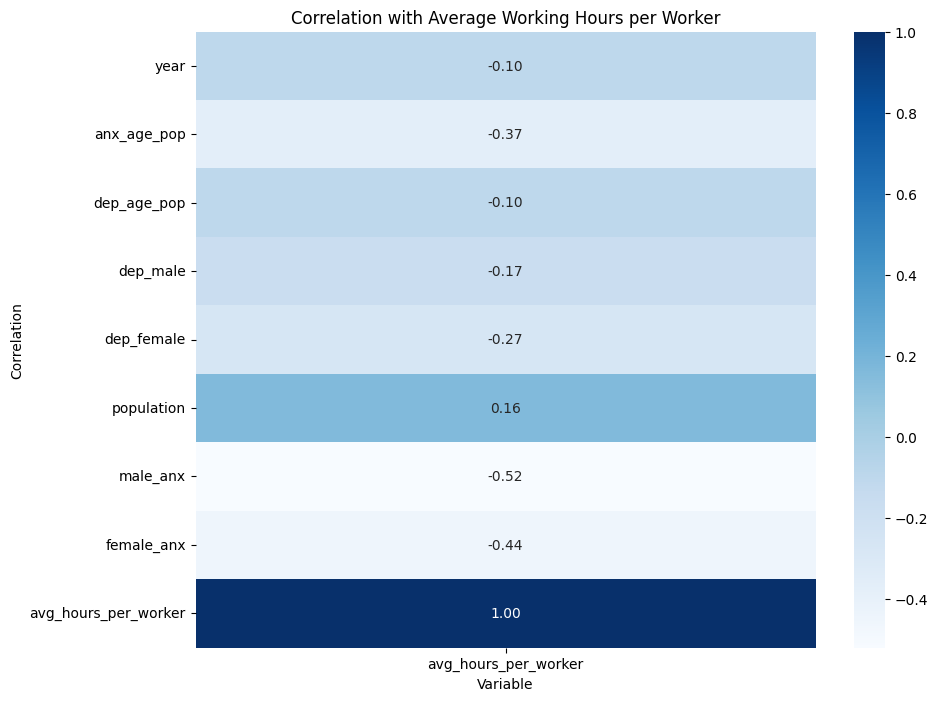

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_hours.to_frame(), cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation with Average Working Hours per Worker')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

In [99]:
df_merged

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
79945,Zimbabwe,ZWE,2019,5-14 years,1.998066,0.384246,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79946,Zimbabwe,ZWE,2019,50-54 years,3.894921,5.535896,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79947,Zimbabwe,ZWE,2019,55-59 years,3.725434,5.855764,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN
79948,Zimbabwe,ZWE,2019,60-64 years,3.541388,6.189030,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN


In [100]:
df_merged = df_merged.assign(avg_hour_per_worker_month = df_merged['avg_hours_per_worker'] / 12,
                           avg_hour_per_worker_week = df_merged['avg_hours_per_worker'] / 52,
                           avg_hour_per_worker_day = df_merged['avg_hours_per_worker'] / 365)

df_merged

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.75040,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79945,Zimbabwe,ZWE,2019,5-14 years,1.998066,0.384246,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN,NaN,NaN,NaN
79946,Zimbabwe,ZWE,2019,50-54 years,3.894921,5.535896,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN,NaN,NaN,NaN
79947,Zimbabwe,ZWE,2019,55-59 years,3.725434,5.855764,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN,NaN,NaN,NaN
79948,Zimbabwe,ZWE,2019,60-64 years,3.541388,6.189030,2.902415,3.81472,15354606.0,2.610298,3.371151,NaN,NaN,NaN,NaN


In [101]:
australia=df_merged[df_merged['country']=='Australia']
australia

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
3510,Australia,AUS,1990,+70 years,3.887360,4.450088,3.670657,5.122896,17048002.0,4.609010,7.098711,1867.9515,155.662625,35.922144,5.117675
3511,Australia,AUS,1990,15-19 years,6.973575,5.300857,3.670657,5.122896,17048002.0,4.609010,7.098711,1867.9515,155.662625,35.922144,5.117675
3512,Australia,AUS,1990,20-24 years,8.142372,6.899789,3.670657,5.122896,17048002.0,4.609010,7.098711,1867.9515,155.662625,35.922144,5.117675
3513,Australia,AUS,1990,25-29 years,8.612638,6.425177,3.670657,5.122896,17048002.0,4.609010,7.098711,1867.9515,155.662625,35.922144,5.117675
3514,Australia,AUS,1990,30-34 years,8.610415,6.071577,3.670657,5.122896,17048002.0,4.609010,7.098711,1867.9515,155.662625,35.922144,5.117675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Australia,AUS,2019,5-14 years,3.654050,1.089024,3.542747,5.218068,25357168.0,4.605393,7.076294,NaN,NaN,NaN,NaN
3896,Australia,AUS,2019,50-54 years,6.802941,5.542084,3.542747,5.218068,25357168.0,4.605393,7.076294,NaN,NaN,NaN,NaN
3897,Australia,AUS,2019,55-59 years,5.992577,5.019401,3.542747,5.218068,25357168.0,4.605393,7.076294,NaN,NaN,NaN,NaN
3898,Australia,AUS,2019,60-64 years,5.208075,4.603428,3.542747,5.218068,25357168.0,4.605393,7.076294,NaN,NaN,NaN,NaN


In [102]:
df_merged.to_csv('all_merged.csv')

In [103]:
work=work.assign(avg_hour_per_worker_month = work['avg_hours_per_worker'] / 12,
                           avg_hour_per_worker_week = work['avg_hours_per_worker'] / 52,
                           avg_hour_per_worker_day = work['avg_hours_per_worker'] / 365)
work

,country,code,year,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Argentina,ARG,1950,2034.0000,169.500000,39.115385,5.572603
1,Argentina,ARG,1951,2037.8667,169.822225,39.189744,5.583196
2,Argentina,ARG,1952,2041.7408,170.145067,39.264246,5.593810
3,Argentina,ARG,1953,2045.6223,170.468525,39.338890,5.604445
4,Argentina,ARG,1954,2049.5112,170.792600,39.413677,5.615099
...,...,...,...,...,...,...,...
3465,Vietnam,VNM,2013,2267.4883,188.957358,43.605544,6.212297
3466,Vietnam,VNM,2014,2150.6357,179.219642,41.358379,5.892153
3467,Vietnam,VNM,2015,2169.5916,180.799300,41.722915,5.944087
3468,Vietnam,VNM,2016,2169.5916,180.799300,41.722915,5.944087


In [104]:
work.to_csv('./data/work_hours.csv')

# Descriptive statistics 

In [105]:
df_stats= df_merged[['anx_age_pop', 'dep_age_pop', 'dep_male', 'dep_female', 
                    'population', 'male_anx', 'female_anx', 'avg_hours_per_worker','avg_hour_per_worker_month',
                    'avg_hour_per_worker_week','avg_hour_per_worker_day']].describe()
df_stats

,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
count,79950.000000,79950.000000,79950.000000,79950.000000,7.995000e+04,79950.000000,79950.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,4.783706,4.975231,2.972566,4.542571,6.367016e+07,3.016795,5.111821,1909.751469,159.145956,36.725990,5.232196
std,1.439517,2.107171,0.814817,1.136821,4.725888e+08,0.790554,1.475836,268.771722,22.397644,5.168687,0.736361
min,0.951037,0.233805,1.197908,1.854329,1.363000e+03,1.334766,2.334763,1353.886800,112.823900,26.036285,3.709279
25%,3.958184,3.853929,2.442394,3.654993,1.162451e+06,2.535321,4.147618,1722.593900,143.549492,33.126806,4.719435
50%,4.675450,4.990478,2.799035,4.487312,6.043282e+06,2.839487,4.913588,1883.193700,156.932808,36.215263,5.159435
75%,5.423972,6.186615,3.430771,5.285774,2.117210e+07,3.398884,5.816682,2084.172100,173.681008,40.080233,5.710061
max,13.736033,13.585142,6.783981,8.900605,7.764951e+09,6.180541,11.678872,2676.756300,223.063025,51.476083,7.333579


<Figure size 1200x800 with 0 Axes>

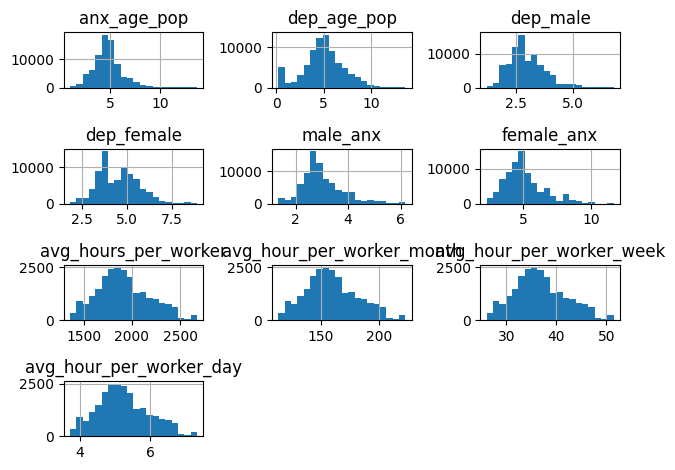

In [106]:
# distribution
plt.figure(figsize=(12, 8))
df_merged.hist(column=['anx_age_pop', 'dep_age_pop', 'dep_male', 'dep_female', 
              'male_anx', 'female_anx', 'avg_hours_per_worker',
              'avg_hour_per_worker_month','avg_hour_per_worker_week','avg_hour_per_worker_day'], bins=20)
plt.tight_layout()
plt.show()

In [107]:
# Correlation update

numeric_df_merged = df_merged.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric features
correlation_matrix = numeric_df_merged.corr()

# Print the correlation matrix
correlation_matrix

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
year,1.000000,0.024685,-0.027070,-0.026579,-0.058485,0.015021,0.111929,0.026353,-0.104040,-0.104040,-0.104040,-0.104040
anx_age_pop,0.024685,1.000000,0.227299,0.040363,0.118709,-0.025597,0.778004,0.815884,-0.370459,-0.370459,-0.370459,-0.370459
dep_age_pop,-0.027070,0.227299,1.000000,0.552854,0.561954,-0.013515,0.019756,-0.014733,-0.098528,-0.098528,-0.098528,-0.098528
dep_male,-0.026579,0.040363,0.552854,1.000000,0.854287,-0.027886,0.068441,0.002003,-0.167040,-0.167040,-0.167040,-0.167040
dep_female,-0.058485,0.118709,0.561954,0.854287,1.000000,-0.025459,0.157195,0.105141,-0.269047,-0.269047,-0.269047,-0.269047
population,0.015021,-0.025597,-0.013515,-0.027886,-0.025459,1.000000,-0.035366,-0.031878,0.161429,0.161429,0.161429,0.161429
male_anx,0.111929,0.778004,0.019756,0.068441,0.157195,-0.035366,1.000000,0.926105,-0.519911,-0.519911,-0.519911,-0.519911
female_anx,0.026353,0.815884,-0.014733,0.002003,0.105141,-0.031878,0.926105,1.000000,-0.444999,-0.444999,-0.444999,-0.444999
avg_hours_per_worker,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,0.161429,-0.519911,-0.444999,1.000000,1.000000,1.000000,1.000000
avg_hour_per_worker_month,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,0.161429,-0.519911,-0.444999,1.000000,1.000000,1.000000,1.000000


In [108]:
correlation_matrix.to_csv('./data/corr_matrix_merged.csv')

In [109]:
corr_hours = correlation_matrix['avg_hour_per_worker_week']
corr_hours

year                        -0.104040
anx_age_pop                 -0.370459
dep_age_pop                 -0.098528
dep_male                    -0.167040
dep_female                  -0.269047
population                   0.161429
male_anx                    -0.519911
female_anx                  -0.444999
avg_hours_per_worker         1.000000
avg_hour_per_worker_month    1.000000
avg_hour_per_worker_week     1.000000
avg_hour_per_worker_day      1.000000
Name: avg_hour_per_worker_week, dtype: float64

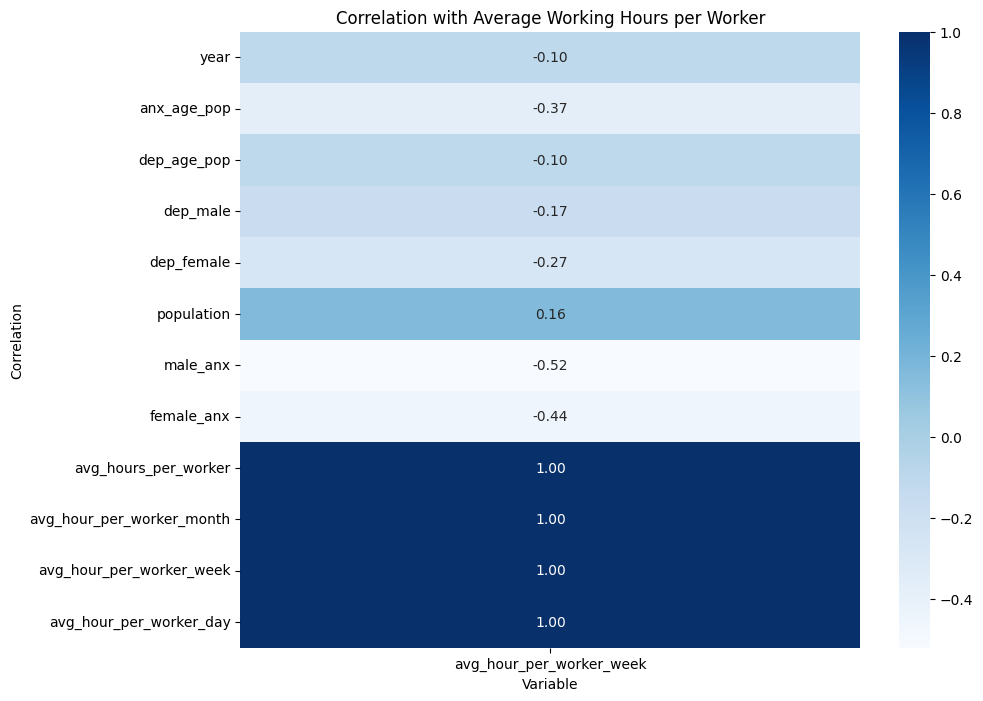

In [110]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_hours.to_frame(), cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation with Average Working Hours per Worker')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

In [111]:


# Assuming df is your DataFrame with the provided columns

# Group by year and week, and calculate the average worked hours for each week
weekly_avg = df_merged.groupby(['year'])['avg_hour_per_worker_week'].mean().reset_index()
weekly_avg.round(2)
# Group by year and calculate the average of weekly averages
#yearly_avg = weekly_avg[weekly_avg.groupby('year')['avg_hour_per_worker_week'].mean()]

# Print or use the yearly_avg variable which contains the average of the average worked hours per week per year
#yearly_avg.round(2)


,year,avg_hour_per_worker_week
0,1990,37.61
1,1991,37.26
2,1992,37.22
3,1993,37.34
4,1994,37.46
5,1995,37.26
6,1996,37.25
7,1997,37.12
8,1998,37.15
9,1999,37.11


# holidays

In [112]:
holidays= pd.read_csv('./data/days-of-vacation-and-holidays.csv')
holidays

,Entity,Code,Year,Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)
0,Australia,AUS,1870,8.0
1,Australia,AUS,1900,9.0
2,Australia,AUS,1938,22.0
3,Australia,AUS,1950,22.0
4,Australia,AUS,1980,32.0
...,...,...,...,...
92,United States,USA,1938,17.0
93,United States,USA,1950,18.0
94,United States,USA,1980,22.0
95,United States,USA,1990,23.0


In [113]:
holidays=holidays.rename(columns={'Entity':'country','Code':'code','Year':'year',
                                 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)':'vacation_days'})

In [114]:
holidays.isnull().sum()

country          0
code             0
year             0
vacation_days    0
dtype: int64

In [115]:
holidays['country'].unique()

array(['Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany',
       'Ireland', 'Italy', 'Netherlands', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'United States'], dtype=object)

In [116]:
holidays['year'].unique()

array([1870, 1900, 1938, 1950, 1980, 1990, 2000])

### working hours

In [117]:
df_merged.describe()

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
count,79950.000000,79950.000000,79950.000000,79950.000000,79950.000000,7.995000e+04,79950.000000,79950.000000,23309.000000,23309.000000,23309.000000,23309.000000
mean,2004.500000,4.783706,4.975231,2.972566,4.542571,6.367016e+07,3.016795,5.111821,1909.751469,159.145956,36.725990,5.232196
std,8.655496,1.439517,2.107171,0.814817,1.136821,4.725888e+08,0.790554,1.475836,268.771722,22.397644,5.168687,0.736361
min,1990.000000,0.951037,0.233805,1.197908,1.854329,1.363000e+03,1.334766,2.334763,1353.886800,112.823900,26.036285,3.709279
25%,1997.000000,3.958184,3.853929,2.442394,3.654993,1.162451e+06,2.535321,4.147618,1722.593900,143.549492,33.126806,4.719435
50%,2004.500000,4.675450,4.990478,2.799035,4.487312,6.043282e+06,2.839487,4.913588,1883.193700,156.932808,36.215263,5.159435
75%,2012.000000,5.423972,6.186615,3.430771,5.285774,2.117210e+07,3.398884,5.816682,2084.172100,173.681008,40.080233,5.710061
max,2019.000000,13.736033,13.585142,6.783981,8.900605,7.764951e+09,6.180541,11.678872,2676.756300,223.063025,51.476083,7.333579


In [118]:
df_merged.columns

Index(['country', 'code', 'year', 'age_range', 'anx_age_pop', 'dep_age_pop',
       'dep_male', 'dep_female', 'population', 'male_anx', 'female_anx',
       'avg_hours_per_worker', 'avg_hour_per_worker_month',
       'avg_hour_per_worker_week', 'avg_hour_per_worker_day'],
      dtype='object')

In [119]:
work

,country,code,year,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Argentina,ARG,1950,2034.0000,169.500000,39.115385,5.572603
1,Argentina,ARG,1951,2037.8667,169.822225,39.189744,5.583196
2,Argentina,ARG,1952,2041.7408,170.145067,39.264246,5.593810
3,Argentina,ARG,1953,2045.6223,170.468525,39.338890,5.604445
4,Argentina,ARG,1954,2049.5112,170.792600,39.413677,5.615099
...,...,...,...,...,...,...,...
3465,Vietnam,VNM,2013,2267.4883,188.957358,43.605544,6.212297
3466,Vietnam,VNM,2014,2150.6357,179.219642,41.358379,5.892153
3467,Vietnam,VNM,2015,2169.5916,180.799300,41.722915,5.944087
3468,Vietnam,VNM,2016,2169.5916,180.799300,41.722915,5.944087


In [120]:
df_mental.columns

Index(['country', 'code', 'year', 'age_range', 'anx_age_pop', 'dep_age_pop',
       'dep_male', 'dep_female', 'male_anx', 'female_anx', 'population'],
      dtype='object')

In [121]:
work_prev= work.merge(df_mental, how='left',on=['country','code','year'])
work_prev

,country,code,year,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population
0,Argentina,ARG,1950,2034.0000,169.500000,39.115385,5.572603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,1951,2037.8667,169.822225,39.189744,5.583196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,ARG,1952,2041.7408,170.145067,39.264246,5.593810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,ARG,1953,2045.6223,170.468525,39.338890,5.604445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,1954,2049.5112,170.792600,39.413677,5.615099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,5-14 years,1.419739,0.337795,1.854224,3.045158,1.648343,2.953763,94033048.0
24982,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,50-54 years,2.924034,4.490768,1.854224,3.045158,1.648343,2.953763,94033048.0
24983,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,55-59 years,2.869673,4.733408,1.854224,3.045158,1.648343,2.953763,94033048.0
24984,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,60-64 years,2.802162,4.805554,1.854224,3.045158,1.648343,2.953763,94033048.0


In [122]:
work_prev= work_prev[(work_prev['year'] >= 1990) & (work_prev['year'] <= 2017)]
work_prev

,country,code,year,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population
40,Argentina,ARG,1990,1850.0000,154.166667,35.576923,5.068493,+70 years,4.341898,3.648916,1.885217,3.257583,3.467441,6.561953,32637658.0
41,Argentina,ARG,1990,1850.0000,154.166667,35.576923,5.068493,15-19 years,6.320540,2.603955,1.885217,3.257583,3.467441,6.561953,32637658.0
42,Argentina,ARG,1990,1850.0000,154.166667,35.576923,5.068493,20-24 years,6.519618,3.431443,1.885217,3.257583,3.467441,6.561953,32637658.0
43,Argentina,ARG,1990,1850.0000,154.166667,35.576923,5.068493,25-29 years,6.585166,3.345512,1.885217,3.257583,3.467441,6.561953,32637658.0
44,Argentina,ARG,1990,1850.0000,154.166667,35.576923,5.068493,30-34 years,6.655914,3.334264,1.885217,3.257583,3.467441,6.561953,32637658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,5-14 years,1.419739,0.337795,1.854224,3.045158,1.648343,2.953763,94033048.0
24982,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,50-54 years,2.924034,4.490768,1.854224,3.045158,1.648343,2.953763,94033048.0
24983,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,55-59 years,2.869673,4.733408,1.854224,3.045158,1.648343,2.953763,94033048.0
24984,Vietnam,VNM,2017,2169.5916,180.799300,41.722915,5.944087,60-64 years,2.802162,4.805554,1.854224,3.045158,1.648343,2.953763,94033048.0


In [123]:
work['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Barbados',
       'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Myanmar', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saint Lucia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'United Kingdom', 'United States', 'Uruguay',
       'Venezuela', 'Vietnam'], dtype=object)

In [124]:
work_prev.isnull().sum()

country                       0
code                          0
year                          0
avg_hours_per_worker          0
avg_hour_per_worker_month     0
avg_hour_per_worker_week      0
avg_hour_per_worker_day       0
age_range                    28
anx_age_pop                  28
dep_age_pop                  28
dep_male                     28
dep_female                   28
male_anx                     28
female_anx                   28
population                   28
dtype: int64

In [125]:
work_prev2= df_mental.merge(work, how='right',on=['country','code','year'])
work_prev2

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Argentina,ARG,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034.0000,169.500000,39.115385,5.572603
1,Argentina,ARG,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2037.8667,169.822225,39.189744,5.583196
2,Argentina,ARG,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2041.7408,170.145067,39.264246,5.593810
3,Argentina,ARG,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2045.6223,170.468525,39.338890,5.604445
4,Argentina,ARG,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2049.5112,170.792600,39.413677,5.615099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,Vietnam,VNM,2017,5-14 years,1.419739,0.337795,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24982,Vietnam,VNM,2017,50-54 years,2.924034,4.490768,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24983,Vietnam,VNM,2017,55-59 years,2.869673,4.733408,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24984,Vietnam,VNM,2017,60-64 years,2.802162,4.805554,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087


In [126]:
work_prev2.isnull().sum()

country                         0
code                            0
year                            0
age_range                    1677
anx_age_pop                  1677
dep_age_pop                  1677
dep_male                     1677
dep_female                   1677
male_anx                     1677
female_anx                   1677
population                   1677
avg_hours_per_worker            0
avg_hour_per_worker_month       0
avg_hour_per_worker_week        0
avg_hour_per_worker_day         0
dtype: int64

In [127]:
work_prev2=work_prev2.dropna()

In [128]:
work_prev2

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
40,Argentina,ARG,1990,+70 years,4.341898,3.648916,1.885217,3.257583,3.467441,6.561953,32637658.0,1850.0000,154.166667,35.576923,5.068493
41,Argentina,ARG,1990,15-19 years,6.320540,2.603955,1.885217,3.257583,3.467441,6.561953,32637658.0,1850.0000,154.166667,35.576923,5.068493
42,Argentina,ARG,1990,20-24 years,6.519618,3.431443,1.885217,3.257583,3.467441,6.561953,32637658.0,1850.0000,154.166667,35.576923,5.068493
43,Argentina,ARG,1990,25-29 years,6.585166,3.345512,1.885217,3.257583,3.467441,6.561953,32637658.0,1850.0000,154.166667,35.576923,5.068493
44,Argentina,ARG,1990,30-34 years,6.655914,3.334264,1.885217,3.257583,3.467441,6.561953,32637658.0,1850.0000,154.166667,35.576923,5.068493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,Vietnam,VNM,2017,5-14 years,1.419739,0.337795,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24982,Vietnam,VNM,2017,50-54 years,2.924034,4.490768,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24983,Vietnam,VNM,2017,55-59 years,2.869673,4.733408,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087
24984,Vietnam,VNM,2017,60-64 years,2.802162,4.805554,1.854224,3.045158,1.648343,2.953763,94033048.0,2169.5916,180.799300,41.722915,5.944087


In [129]:
work_prev2['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Barbados',
       'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mexico', 'Myanmar',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saint Lucia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Trinidad and Tobago', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Venezuela',
       'Vietnam'], dtype=object)

In [130]:
work_prev2.describe()

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
count,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,23309.000000,2.330900e+04,23309.000000,23309.000000,23309.000000,23309.000000
mean,2003.735081,5.299242,4.445749,2.612240,4.169497,3.337324,5.803949,7.876992e+07,1909.751469,159.145956,36.725990,5.232196
std,7.924560,1.755658,1.730987,0.583785,1.013088,0.976226,1.819343,2.122082e+08,268.771722,22.397644,5.168687,0.736361
min,1990.000000,0.951037,0.233805,1.433894,2.274636,1.334766,2.614963,1.423150e+05,1353.886800,112.823900,26.036285,3.709279
25%,1997.000000,4.102103,3.505549,2.145196,3.460212,2.621504,4.365718,5.228143e+06,1722.593900,143.549492,33.126806,4.719435
50%,2004.000000,5.002464,4.556059,2.596472,3.990588,3.047869,5.383550,1.762446e+07,1883.193700,156.932808,36.215263,5.159435
75%,2011.000000,6.414182,5.552896,3.005644,4.918777,3.994428,6.979208,5.999585e+07,2084.172100,173.681008,40.080233,5.710061
max,2017.000000,13.736033,9.846533,4.529426,7.369483,6.156805,11.678872,1.410276e+09,2676.756300,223.063025,51.476083,7.333579


In [131]:


numeric_work_prev2 = work_prev2.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric features
correlation_matrix_work = numeric_work_prev2.corr()

# Print the correlation matrix
correlation_matrix_work

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,male_anx,female_anx,population,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
year,1.000000,0.012713,-0.040500,-0.063945,-0.073200,0.061927,0.012476,0.029707,-0.104040,-0.104040,-0.104040,-0.104040
anx_age_pop,0.012713,1.000000,0.369979,0.239042,0.309944,0.803061,0.843215,-0.169014,-0.370459,-0.370459,-0.370459,-0.370459
dep_age_pop,-0.040500,0.369979,1.000000,0.528948,0.547353,0.157219,0.139530,0.036392,-0.098528,-0.098528,-0.098528,-0.098528
dep_male,-0.063945,0.239042,0.528948,1.000000,0.861354,0.320957,0.252166,0.049691,-0.167040,-0.167040,-0.167040,-0.167040
dep_female,-0.073200,0.309944,0.547353,0.861354,1.000000,0.370435,0.361353,0.009479,-0.269047,-0.269047,-0.269047,-0.269047
male_anx,0.061927,0.803061,0.157219,0.320957,0.370435,1.000000,0.903693,-0.209670,-0.519911,-0.519911,-0.519911,-0.519911
female_anx,0.012476,0.843215,0.139530,0.252166,0.361353,0.903693,1.000000,-0.211859,-0.444999,-0.444999,-0.444999,-0.444999
population,0.029707,-0.169014,0.036392,0.049691,0.009479,-0.209670,-0.211859,1.000000,0.161429,0.161429,0.161429,0.161429
avg_hours_per_worker,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,-0.519911,-0.444999,0.161429,1.000000,1.000000,1.000000,1.000000
avg_hour_per_worker_month,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,-0.519911,-0.444999,0.161429,1.000000,1.000000,1.000000,1.000000


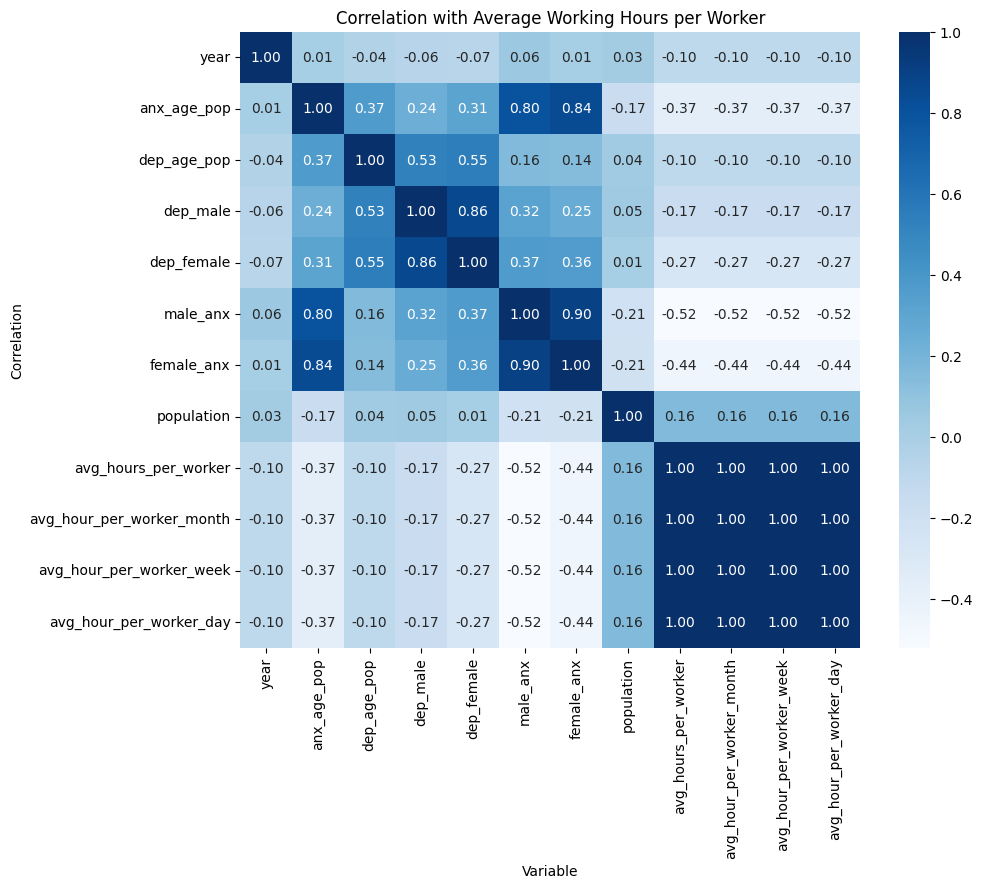

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_work, cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation with Average Working Hours per Worker')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

In [133]:
# save dataframe with countries with working hours info

work_prev2.to_csv('./data/work_prev2.csv')

In [134]:
work_prev2.isnull().sum()

country                      0
code                         0
year                         0
age_range                    0
anx_age_pop                  0
dep_age_pop                  0
dep_male                     0
dep_female                   0
male_anx                     0
female_anx                   0
population                   0
avg_hours_per_worker         0
avg_hour_per_worker_month    0
avg_hour_per_worker_week     0
avg_hour_per_worker_day      0
dtype: int64

In [135]:
work_prev2.columns

Index(['country', 'code', 'year', 'age_range', 'anx_age_pop', 'dep_age_pop',
       'dep_male', 'dep_female', 'male_anx', 'female_anx', 'population',
       'avg_hours_per_worker', 'avg_hour_per_worker_month',
       'avg_hour_per_worker_week', 'avg_hour_per_worker_day'],
      dtype='object')

In [137]:
correlation_matrix_work.to_csv('./data/corr_work.csv')

In [138]:
world= df_merged[df_merged['country']=='World']
world

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
78390,World,OWID_WRL,1990,+70 years,4.536546,5.397238,2.700708,4.262524,5.316176e+09,2.726062,4.732194,NaN,NaN,NaN,NaN
78391,World,OWID_WRL,1990,15-19 years,4.473128,2.601022,2.700708,4.262524,5.316176e+09,2.726062,4.732194,NaN,NaN,NaN,NaN
78392,World,OWID_WRL,1990,20-24 years,4.606164,3.974469,2.700708,4.262524,5.316176e+09,2.726062,4.732194,NaN,NaN,NaN,NaN
78393,World,OWID_WRL,1990,25-29 years,4.663348,4.343238,2.700708,4.262524,5.316176e+09,2.726062,4.732194,NaN,NaN,NaN,NaN
78394,World,OWID_WRL,1990,30-34 years,4.729382,4.635069,2.700708,4.262524,5.316176e+09,2.726062,4.732194,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78775,World,OWID_WRL,2019,5-14 years,2.325191,0.524049,2.713272,4.158382,7.764951e+09,2.933640,4.694665,NaN,NaN,NaN,NaN
78776,World,OWID_WRL,2019,50-54 years,4.829640,5.622491,2.713272,4.158382,7.764951e+09,2.933640,4.694665,NaN,NaN,NaN,NaN
78777,World,OWID_WRL,2019,55-59 years,4.815423,5.844055,2.713272,4.158382,7.764951e+09,2.933640,4.694665,NaN,NaN,NaN,NaN
78778,World,OWID_WRL,2019,60-64 years,4.730491,5.956511,2.713272,4.158382,7.764951e+09,2.933640,4.694665,NaN,NaN,NaN,NaN


In [139]:
df_merged= df_merged[df_merged['country']!='World']


In [140]:
df_merged.to_csv('all_merged.csv')

In [141]:
df_merged.shape

(79560, 15)

In [142]:
df_merged_2017=df_merged[df_merged['year']<=2017]
df_merged_2017

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79919,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79920,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79921,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79922,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN


In [143]:
df_merged_2017.to_csv('all_merged_2017.csv')

In [144]:
inequality= pd.read_csv('./data/inequality.csv')
inequality

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),p0p100_gini_posttax_nat,s80_s20_ratio_pretax,...,p99_9p100_thr_posttax_nat,p99p100_thr_posttax_nat,median_pretax,median_posttax_nat,headcount_ratio_40_median_pretax,headcount_ratio_50_median_pretax,headcount_ratio_60_median_pretax,headcount_ratio_40_median_posttax_nat,headcount_ratio_50_median_posttax_nat,headcount_ratio_60_median_posttax_nat
0,Afghanistan,2008,0.524524,41.940002,16.220001,5.66,17.16,3.701677,NaN,21.515385,...,NaN,NaN,2608.1582,NaN,16.000000,18.0,24.0,NaN,NaN,NaN
1,Afghanistan,2012,0.492656,38.760002,13.820000,4.54,19.00,3.030492,NaN,18.358622,...,NaN,NaN,3531.4514,NaN,15.000001,18.0,21.0,NaN,NaN,NaN
2,Afghanistan,2017,0.515393,41.010002,15.080001,5.02,17.79,3.417500,NaN,19.938848,...,NaN,NaN,3157.4958,NaN,15.000001,17.0,20.0,NaN,NaN,NaN
3,Africa (WID),1980,0.702044,58.560000,21.830000,7.12,7.38,13.843971,NaN,93.320510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa (WID),1981,0.697559,57.980000,21.510000,6.75,7.56,13.267735,NaN,89.320984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,Zimbabwe,1991,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,3535.1682,NaN,19.000000,24.0,29.0,NaN,NaN,NaN
4582,Zimbabwe,1996,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,3505.6372,NaN,19.000000,24.0,29.0,NaN,NaN,NaN
4583,Zimbabwe,2011,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,2332.4502,NaN,19.000000,24.0,29.0,NaN,NaN,NaN
4584,Zimbabwe,2017,0.635799,52.569996,17.480000,5.15,11.25,7.281163,NaN,41.567900,...,NaN,NaN,2416.1062,NaN,18.000000,22.0,29.0,NaN,NaN,NaN


In [145]:
inequality= inequality[(inequality['Year']>=1990)&(inequality['Year']<=2017)]
inequality

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),p0p100_gini_posttax_nat,s80_s20_ratio_pretax,...,p99_9p100_thr_posttax_nat,p99p100_thr_posttax_nat,median_pretax,median_posttax_nat,headcount_ratio_40_median_pretax,headcount_ratio_50_median_pretax,headcount_ratio_60_median_pretax,headcount_ratio_40_median_posttax_nat,headcount_ratio_50_median_posttax_nat,headcount_ratio_60_median_posttax_nat
0,Afghanistan,2008,0.524524,41.940002,16.220001,5.66,17.16,3.701677,NaN,21.515385,...,NaN,NaN,2608.1582,NaN,16.000000,18.000000,24.0,NaN,NaN,NaN
1,Afghanistan,2012,0.492656,38.760002,13.820000,4.54,19.00,3.030492,NaN,18.358622,...,NaN,NaN,3531.4514,NaN,15.000001,18.000000,21.0,NaN,NaN,NaN
2,Afghanistan,2017,0.515393,41.010002,15.080001,5.02,17.79,3.417500,NaN,19.938848,...,NaN,NaN,3157.4958,NaN,15.000001,17.000000,20.0,NaN,NaN,NaN
13,Africa (WID),1990,0.694815,56.940002,20.250000,6.18,7.30,13.524940,NaN,91.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Africa (WID),1991,0.698570,57.390000,20.460001,6.35,7.14,13.997561,NaN,95.065790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,Zambia,2015,0.722217,61.739998,23.170000,7.51,6.95,14.805756,NaN,88.835300,...,NaN,NaN,2513.6035,NaN,24.000000,30.000002,35.0,NaN,NaN,NaN
4581,Zimbabwe,1991,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,3535.1682,NaN,19.000000,24.000000,29.0,NaN,NaN,NaN
4582,Zimbabwe,1996,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,3505.6372,NaN,19.000000,24.000000,29.0,NaN,NaN,NaN
4583,Zimbabwe,2011,0.624443,51.330000,17.410000,5.29,11.81,6.853137,NaN,42.889610,...,NaN,NaN,2332.4502,NaN,19.000000,24.000000,29.0,NaN,NaN,NaN


In [146]:
inequality.isnull().sum()

Country                                                                        0
Year                                                                           0
Gini coefficient (before tax) (World Inequality Database)                      0
Income share of the richest 10% (before tax) (World Inequality Database)       0
Income share of the richest 1% (before tax) (World Inequality Database)        0
                                                                            ... 
headcount_ratio_50_median_pretax                                             952
headcount_ratio_60_median_pretax                                             952
headcount_ratio_40_median_posttax_nat                                       1934
headcount_ratio_50_median_posttax_nat                                       1934
headcount_ratio_60_median_posttax_nat                                       1934
Length: 114, dtype: int64

In [147]:
inequality.columns

Index(['Country', 'Year',
       'Gini coefficient (before tax) (World Inequality Database)',
       'Income share of the richest 10% (before tax) (World Inequality Database)',
       'Income share of the richest 1% (before tax) (World Inequality Database)',
       'Income share of the richest 0.1% (before tax) (World Inequality Database)',
       'Income share of the poorest 50% (before tax) (World Inequality Database)',
       'Palma ratio (before tax) (World Inequality Database)',
       'p0p100_gini_posttax_nat', 's80_s20_ratio_pretax',
       ...
       'p99_9p100_thr_posttax_nat', 'p99p100_thr_posttax_nat', 'median_pretax',
       'median_posttax_nat', 'headcount_ratio_40_median_pretax',
       'headcount_ratio_50_median_pretax', 'headcount_ratio_60_median_pretax',
       'headcount_ratio_40_median_posttax_nat',
       'headcount_ratio_50_median_posttax_nat',
       'headcount_ratio_60_median_posttax_nat'],
      dtype='object', length=114)

In [148]:
inequality= inequality.drop(columns=['Income share of the richest 10% (before tax) (World Inequality Database)',
       'Income share of the richest 1% (before tax) (World Inequality Database)',
       'Income share of the richest 0.1% (before tax) (World Inequality Database)',
       'Income share of the poorest 50% (before tax) (World Inequality Database)',
       'Palma ratio (before tax) (World Inequality Database)',
       'p0p100_gini_posttax_nat', 's80_s20_ratio_pretax','p99_9p100_thr_posttax_nat', 'p99p100_thr_posttax_nat', 'median_pretax',
       'median_posttax_nat', 'headcount_ratio_40_median_pretax',
       'headcount_ratio_50_median_pretax', 'headcount_ratio_60_median_pretax',
       'headcount_ratio_40_median_posttax_nat',
       'headcount_ratio_50_median_posttax_nat',
       'headcount_ratio_60_median_posttax_nat','p90_p10_ratio_pretax', 'p90_p50_ratio_pretax', 'p50_p10_ratio_pretax',
       'palma_ratio_posttax_nat', 's80_s20_ratio_posttax_nat',
       'p90_p10_ratio_posttax_nat', 'p90_p50_ratio_posttax_nat',
       'p50_p10_ratio_posttax_nat', 'p0p10_share_pretax',
       'p10p20_share_pretax', 'p20p30_share_pretax', 'p30p40_share_pretax',
       'p40p50_share_pretax', 'p50p60_share_pretax', 'p60p70_share_pretax',
       'p70p80_share_pretax', 'p80p90_share_pretax',
       'p99_999p100_share_pretax', 'p99_99p100_share_pretax',
       'p90p99_share_pretax', 'p50p90_share_pretax', 'p0p10_share_posttax_nat',
       'p0p50_share_posttax_nat', 'p10p20_share_posttax_nat',
       'p20p30_share_posttax_nat', 'p30p40_share_posttax_nat',
       'p40p50_share_posttax_nat', 'p50p60_share_posttax_nat',
       'p60p70_share_posttax_nat', 'p70p80_share_posttax_nat',
       'p80p90_share_posttax_nat', 'p90p100_share_posttax_nat',
       'p99_999p100_share_posttax_nat', 'p99_99p100_share_posttax_nat',
       'p99_9p100_share_posttax_nat', 'p99p100_share_posttax_nat',
       'p90p99_share_posttax_nat', 'p50p90_share_posttax_nat',
       'p0p100_avg_pretax', 'p0p10_avg_pretax', 'p10p20_avg_pretax',
       'p20p30_avg_pretax', 'p30p40_avg_pretax', 'p40p50_avg_pretax',
       'p50p60_avg_pretax', 'p60p70_avg_pretax', 'p70p80_avg_pretax',
       'p80p90_avg_pretax', 'p90p100_avg_pretax', 'p99_999p100_avg_pretax',
       'p99_99p100_avg_pretax', 'p99_9p100_avg_pretax', 'p99p100_avg_pretax',
       'p0p100_avg_posttax_nat', 'p0p10_avg_posttax_nat',
       'p10p20_avg_posttax_nat', 'p20p30_avg_posttax_nat',
       'p30p40_avg_posttax_nat', 'p40p50_avg_posttax_nat',
       'p50p60_avg_posttax_nat', 'p60p70_avg_posttax_nat',
       'p70p80_avg_posttax_nat', 'p80p90_avg_posttax_nat',
       'p90p100_avg_posttax_nat', 'p99_999p100_avg_posttax_nat',
       'p99_99p100_avg_posttax_nat', 'p99_9p100_avg_posttax_nat',
       'p99p100_avg_posttax_nat', 'p0p10_thr_pretax', 'p10p20_thr_pretax',
       'p20p30_thr_pretax', 'p30p40_thr_pretax', 'p40p50_thr_pretax',
       'p50p60_thr_pretax', 'p60p70_thr_pretax', 'p70p80_thr_pretax',
       'p80p90_thr_pretax', 'p90p100_thr_pretax', 'p99_999p100_thr_pretax',
       'p99_99p100_thr_pretax', 'p99_9p100_thr_pretax', 'p99p100_thr_pretax',
       'p0p10_thr_posttax_nat', 'p10p20_thr_posttax_nat',
       'p20p30_thr_posttax_nat', 'p30p40_thr_posttax_nat',
       'p40p50_thr_posttax_nat', 'p50p60_thr_posttax_nat',
       'p60p70_thr_posttax_nat', 'p70p80_thr_posttax_nat',
       'p80p90_thr_posttax_nat', 'p90p100_thr_posttax_nat',
       'p99_999p100_thr_posttax_nat', 'p99_99p100_thr_posttax_nat'])
inequality

,Country,Year,Gini coefficient (before tax) (World Inequality Database)
0,Afghanistan,2008,0.524524
1,Afghanistan,2012,0.492656
2,Afghanistan,2017,0.515393
13,Africa (WID),1990,0.694815
14,Africa (WID),1991,0.698570
...,...,...,...
4573,Zambia,2015,0.722217
4581,Zimbabwe,1991,0.624443
4582,Zimbabwe,1996,0.624443
4583,Zimbabwe,2011,0.624443


In [149]:
inequality=inequality.rename(columns={'Country':'country','Year':'year',
                                     'Gini coefficient (before tax) (World Inequality Database)':'inequality'})
inequality

,country,year,inequality
0,Afghanistan,2008,0.524524
1,Afghanistan,2012,0.492656
2,Afghanistan,2017,0.515393
13,Africa (WID),1990,0.694815
14,Africa (WID),1991,0.698570
...,...,...,...
4573,Zambia,2015,0.722217
4581,Zimbabwe,1991,0.624443
4582,Zimbabwe,1996,0.624443
4583,Zimbabwe,2011,0.624443


In [150]:
inequality.describe()

,year,inequality
count,2969.000000,2969.000000
mean,2004.470192,0.550418
std,7.866508,0.100356
min,1990.000000,0.264329
25%,1998.000000,0.470373
50%,2005.000000,0.542390
75%,2011.000000,0.632595
max,2017.000000,0.781373


In [151]:
df_merged_2017_2=df_merged_2017.merge(inequality, how='left',on=['country','year'])

In [152]:
df_merged_2017_2

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74251,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,0.635799
74252,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,0.635799
74253,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,0.635799
74254,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,0.635799


In [153]:
df_merged_2017_2.isnull().sum()

country                          0
code                             0
year                             0
age_range                        0
anx_age_pop                      0
dep_age_pop                      0
dep_male                         0
dep_female                       0
population                       0
male_anx                         0
female_anx                       0
avg_hours_per_worker         50947
avg_hour_per_worker_month    50947
avg_hour_per_worker_week     50947
avg_hour_per_worker_day      50947
inequality                   48971
dtype: int64

In [154]:

numeric_2017_prev2 = df_merged_2017_2.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric features
correlation_matrix_2017 = numeric_2017_prev2.corr()

# Print the correlation matrix
correlation_matrix_2017

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality
year,1.000000,0.022328,-0.025943,-0.025398,-0.056691,0.026773,0.103665,0.024635,-0.104040,-0.104040,-0.104040,-0.104040,0.148317
anx_age_pop,0.022328,1.000000,0.225812,0.039638,0.117492,-0.048505,0.778026,0.816229,-0.370459,-0.370459,-0.370459,-0.370459,-0.129021
dep_age_pop,-0.025943,0.225812,1.000000,0.553954,0.563246,-0.013570,0.019347,-0.015190,-0.098528,-0.098528,-0.098528,-0.098528,0.108398
dep_male,-0.025398,0.039638,0.553954,1.000000,0.853646,-0.035130,0.067478,0.001371,-0.167040,-0.167040,-0.167040,-0.167040,0.200891
dep_female,-0.056691,0.117492,0.563246,0.853646,1.000000,-0.030758,0.156272,0.103681,-0.269047,-0.269047,-0.269047,-0.269047,0.109188
population,0.026773,-0.048505,-0.013570,-0.035130,-0.030758,1.000000,-0.066409,-0.058914,0.161429,0.161429,0.161429,0.161429,0.064691
male_anx,0.103665,0.778026,0.019347,0.067478,0.156272,-0.066409,1.000000,0.925902,-0.519911,-0.519911,-0.519911,-0.519911,-0.232538
female_anx,0.024635,0.816229,-0.015190,0.001371,0.103681,-0.058914,0.925902,1.000000,-0.444999,-0.444999,-0.444999,-0.444999,-0.182366
avg_hours_per_worker,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,0.161429,-0.519911,-0.444999,1.000000,1.000000,1.000000,1.000000,0.479749
avg_hour_per_worker_month,-0.104040,-0.370459,-0.098528,-0.167040,-0.269047,0.161429,-0.519911,-0.444999,1.000000,1.000000,1.000000,1.000000,0.479749


In [155]:
df_merged_2017.columns

Index(['country', 'code', 'year', 'age_range', 'anx_age_pop', 'dep_age_pop',
       'dep_male', 'dep_female', 'population', 'male_anx', 'female_anx',
       'avg_hours_per_worker', 'avg_hour_per_worker_month',
       'avg_hour_per_worker_week', 'avg_hour_per_worker_day'],
      dtype='object')

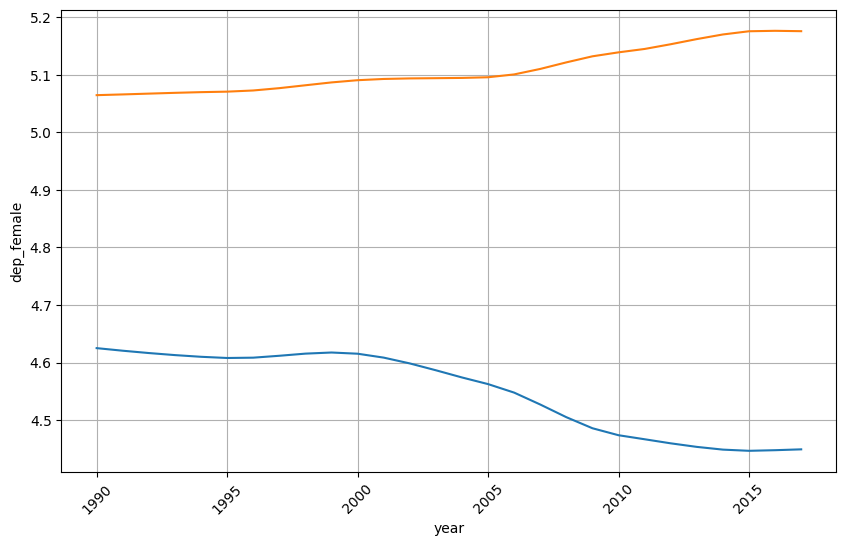

In [157]:
# Productivity Ratio remote work over time
# Aggregate data by date and calculate mean satisfaction ratio for each date
mental_trend = df_merged_2017.groupby('year')['dep_female'].mean()
mentalanx_trend = df_merged_2017.groupby('year')['female_anx'].mean()
# Plot trend in satisfaction ratio over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=mental_trend)
sns.lineplot(data=mentalanx_trend)
#plt.title('Trend in Satisfaction Ratio Working Remote Over Time')
#plt.xlabel(‘Hours’)
#plt.ylabel(‘Mean Productivity Ratio’)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79919,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79920,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79921,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79922,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
